#DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

##Objective:
* This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
* Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

##1. Data Exploration and Preprocessing:
* Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
* Handle missing values as per the best practices (imputation, removal, etc.).
* Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
* Discuss the scenarios where each scaling technique is preferred and why.


In [2]:
adult = pd.read_csv('/content/adult_with_headers.csv')
adult

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [3]:
adult.info()
# There are 32561 entries with 15 features
# age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week (6) columns are of *int64* dtype
# workclass, education, marital_status, occupation, relationship, race, sex, native_country, income (9) columns are of *object* dtype
# There are no missing values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult.describe()
# Many outliers are present in each column

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

####EDA-1

In [5]:
# Lets check for the duplicate values
adult[adult.duplicated(keep=False)]

age          workclass  fnlwgt      education  education_num  \
2303    90            Private   52386   Some-college             10   
3917    19            Private  251579   Some-college             10   
4325    25            Private  308144      Bachelors             13   
4767    21            Private  250051   Some-college             10   
4881    25            Private  308144      Bachelors             13   
4940    38            Private  207202        HS-grad              9   
5104    90            Private   52386   Some-college             10   
5579    27            Private  255582        HS-grad              9   
5805    20            Private  107658   Some-college             10   
5842    25            Private  195994        1st-4th              2   
6990    19            Private  138153   Some-college             10   
7053    49   Self-emp-not-inc   43479   Some-college             10   
7920    49            Private   31267        7th-8th              4   
8080    21            Private  243368      Preschool              1   
8679    28            Private  274679        Masters             14   
9171    21            Private  250051   Some-college             10   
10367   42            Private  204235   Some-college             10   
11631   20            Private  107658   Some-college             10   
11965   46            Private  133616   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
15189   19            Private  146679   Some-college             10   
16297   46            Private  173243        HS-grad              9   
16846   35            Private  379959        HS-grad              9   
16975   30            Private  144593        HS-grad              9   
17040   46            Private  173243        HS-grad              9   
17673   19            Private   97261        HS-grad              9   
17916   44            Private  367749      Bachelors             13   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21103   23            Private  240137        5th-6th              3   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25624   39            Private   30916        HS-grad              9   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital_status          occupation    relationship  \
2303         Never-married       Other-service   Not-in-family   
3917         Never-married       Other-service       Own-child   
4325         Never-married        Craft-repair   Not-in-family   
4767         Never-married      Prof-specialty       Own-child   
4881         Never-married        Craft-repair   Not-in-family   
4940    Married-civ-spouse   Machine-op-inspct         Husband   
5104         Never-married       Other-service   Not-in-family   
5579         Never-married   Machine-op-inspct   Not-in-family   
5805

In [6]:
adult.drop_duplicates(inplace=True)
adult.duplicated().sum()
# All the duplicate rows have been removed

0

In [7]:
# Lets check for the missing values
adult.isna().sum()
# No missing values available

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Eventhough the data seems containing no missing values, lets see some inconsistent data below

In [8]:
adult['workclass'].unique()
# Here ' ?' value represents a string with inconsistent data

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
adult['occupation'].unique()
# Here ' ?' value represents a string with inconsistent data

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
adult['native_country'].unique()
# Here ' ?' value represents a string with inconsistent data

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [11]:
# Lets remove the extra spacing from each of the categorical value
# Also, lets replace '?' with 'Other' in each inconsistent column
for i in adult.columns:
    if adult[i].dtype == 'object':
        adult[i] = adult[i].str.strip()
        adult[i] = adult[i].str.replace('?','Other')
        print(i+":",adult[i].unique())

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native_country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Other' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras'

####Visualizations

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

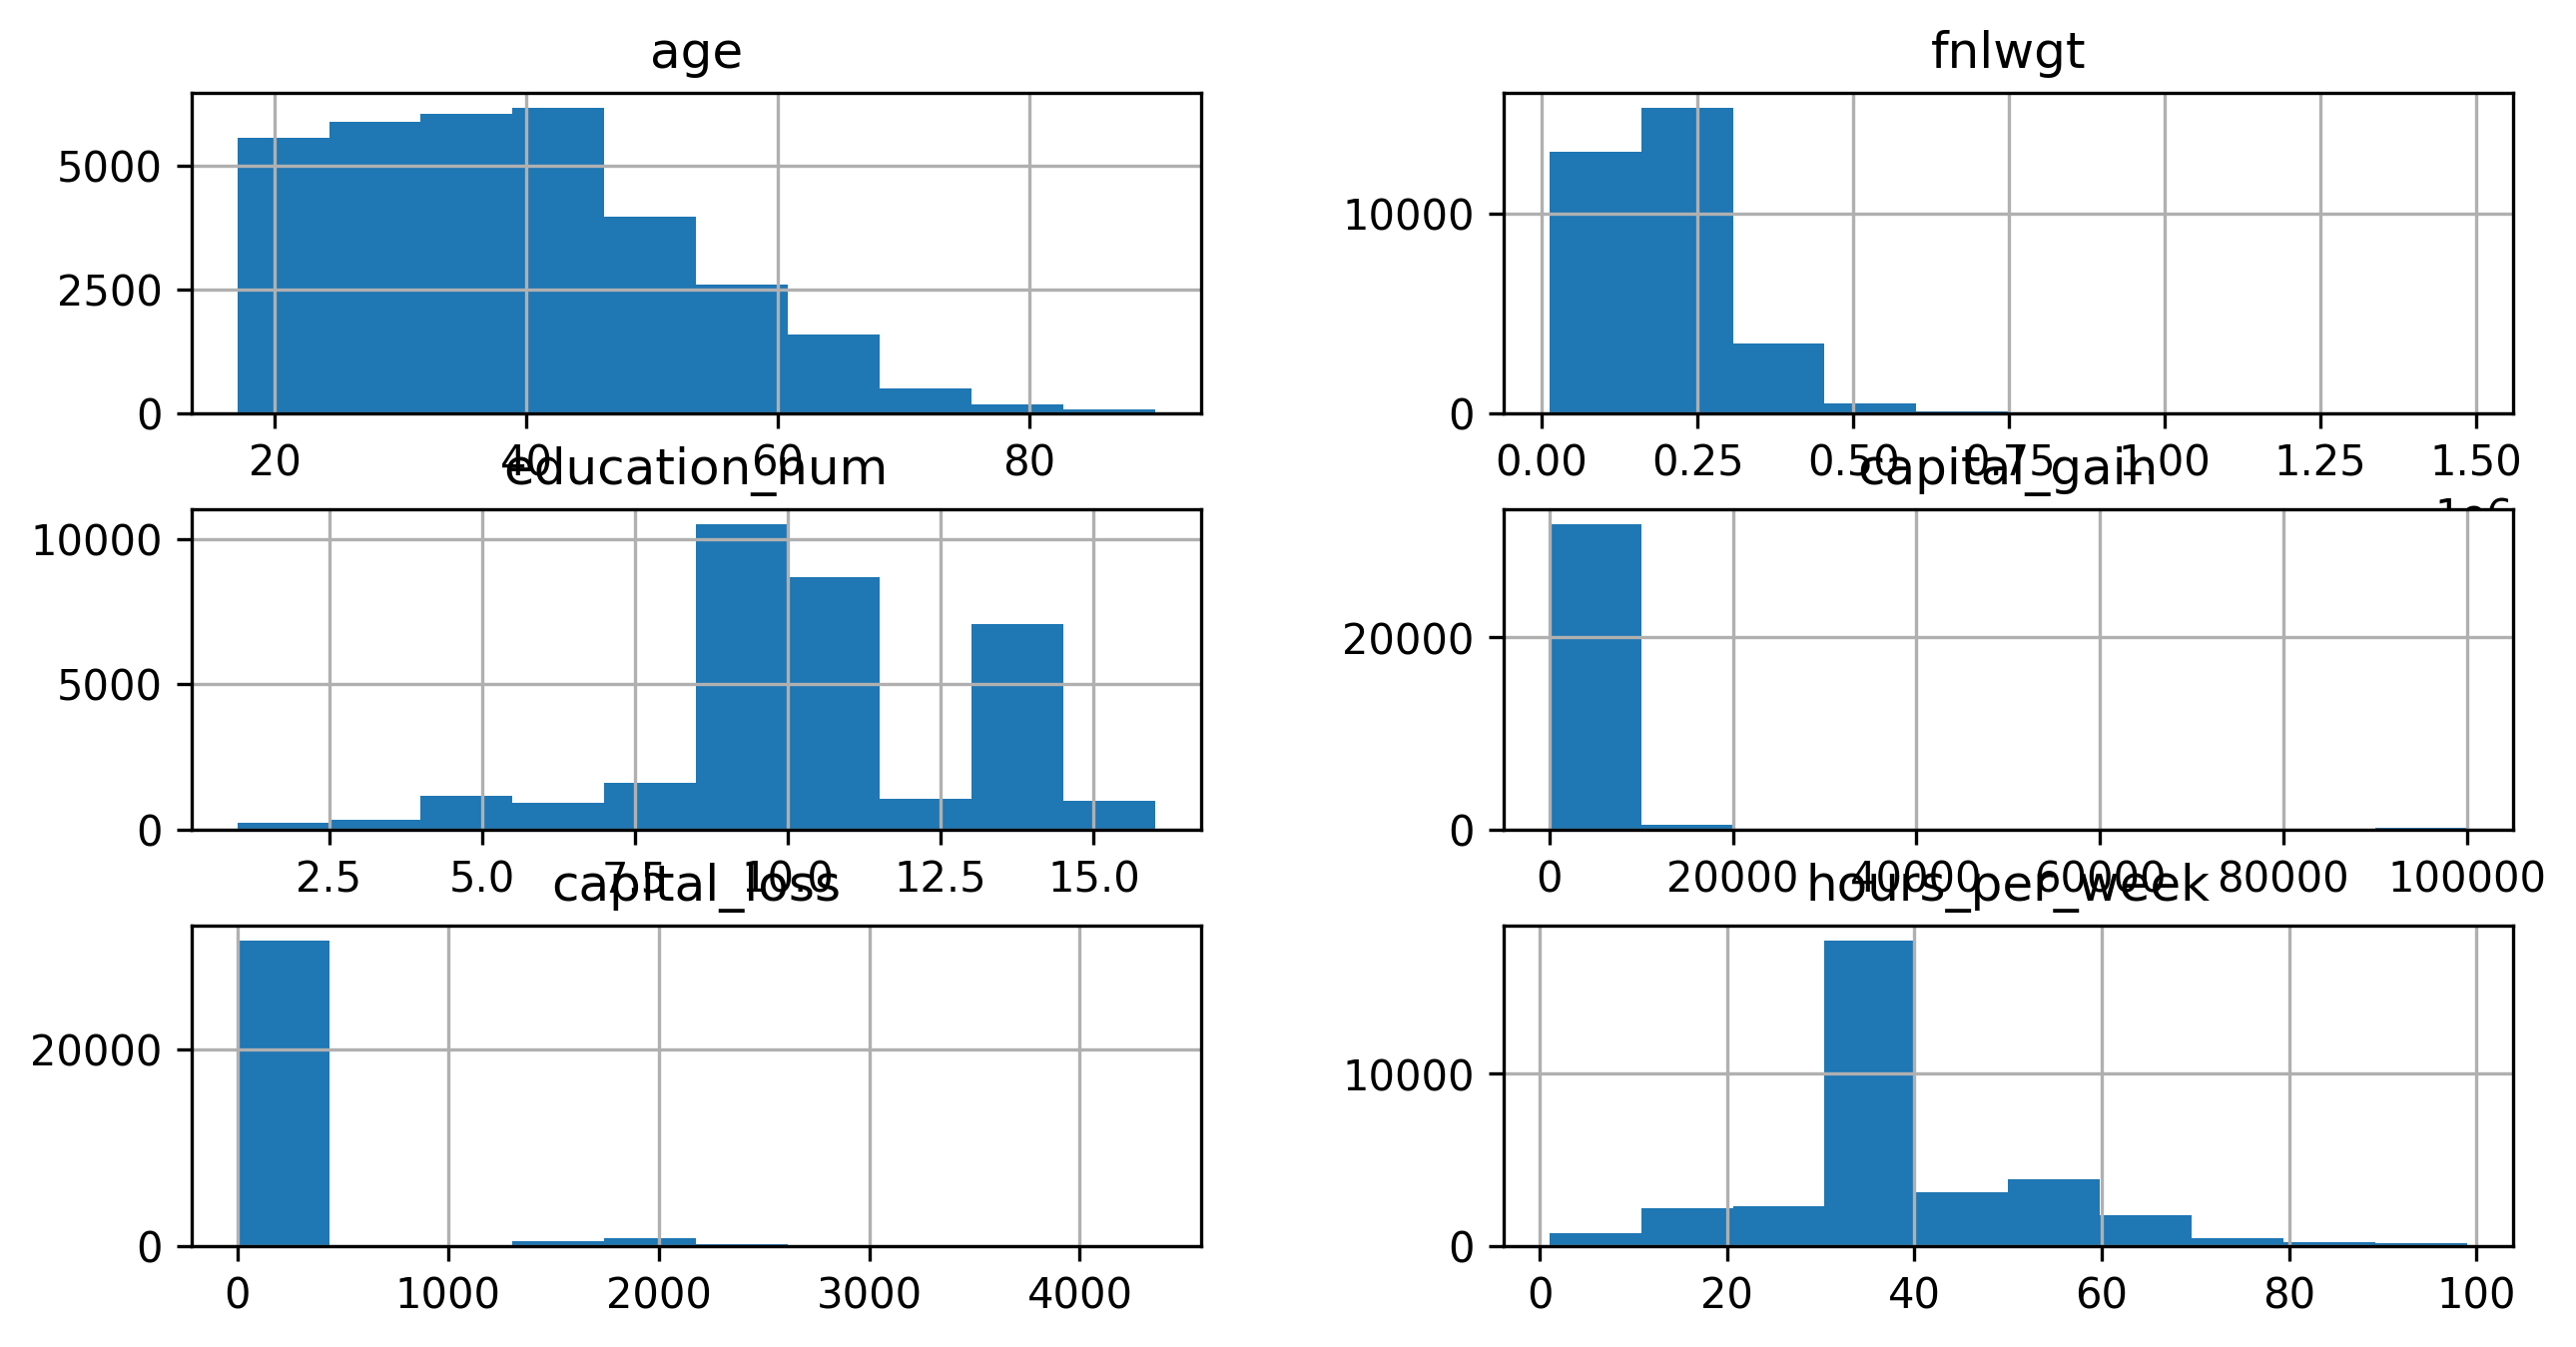

In [12]:
adult.hist()

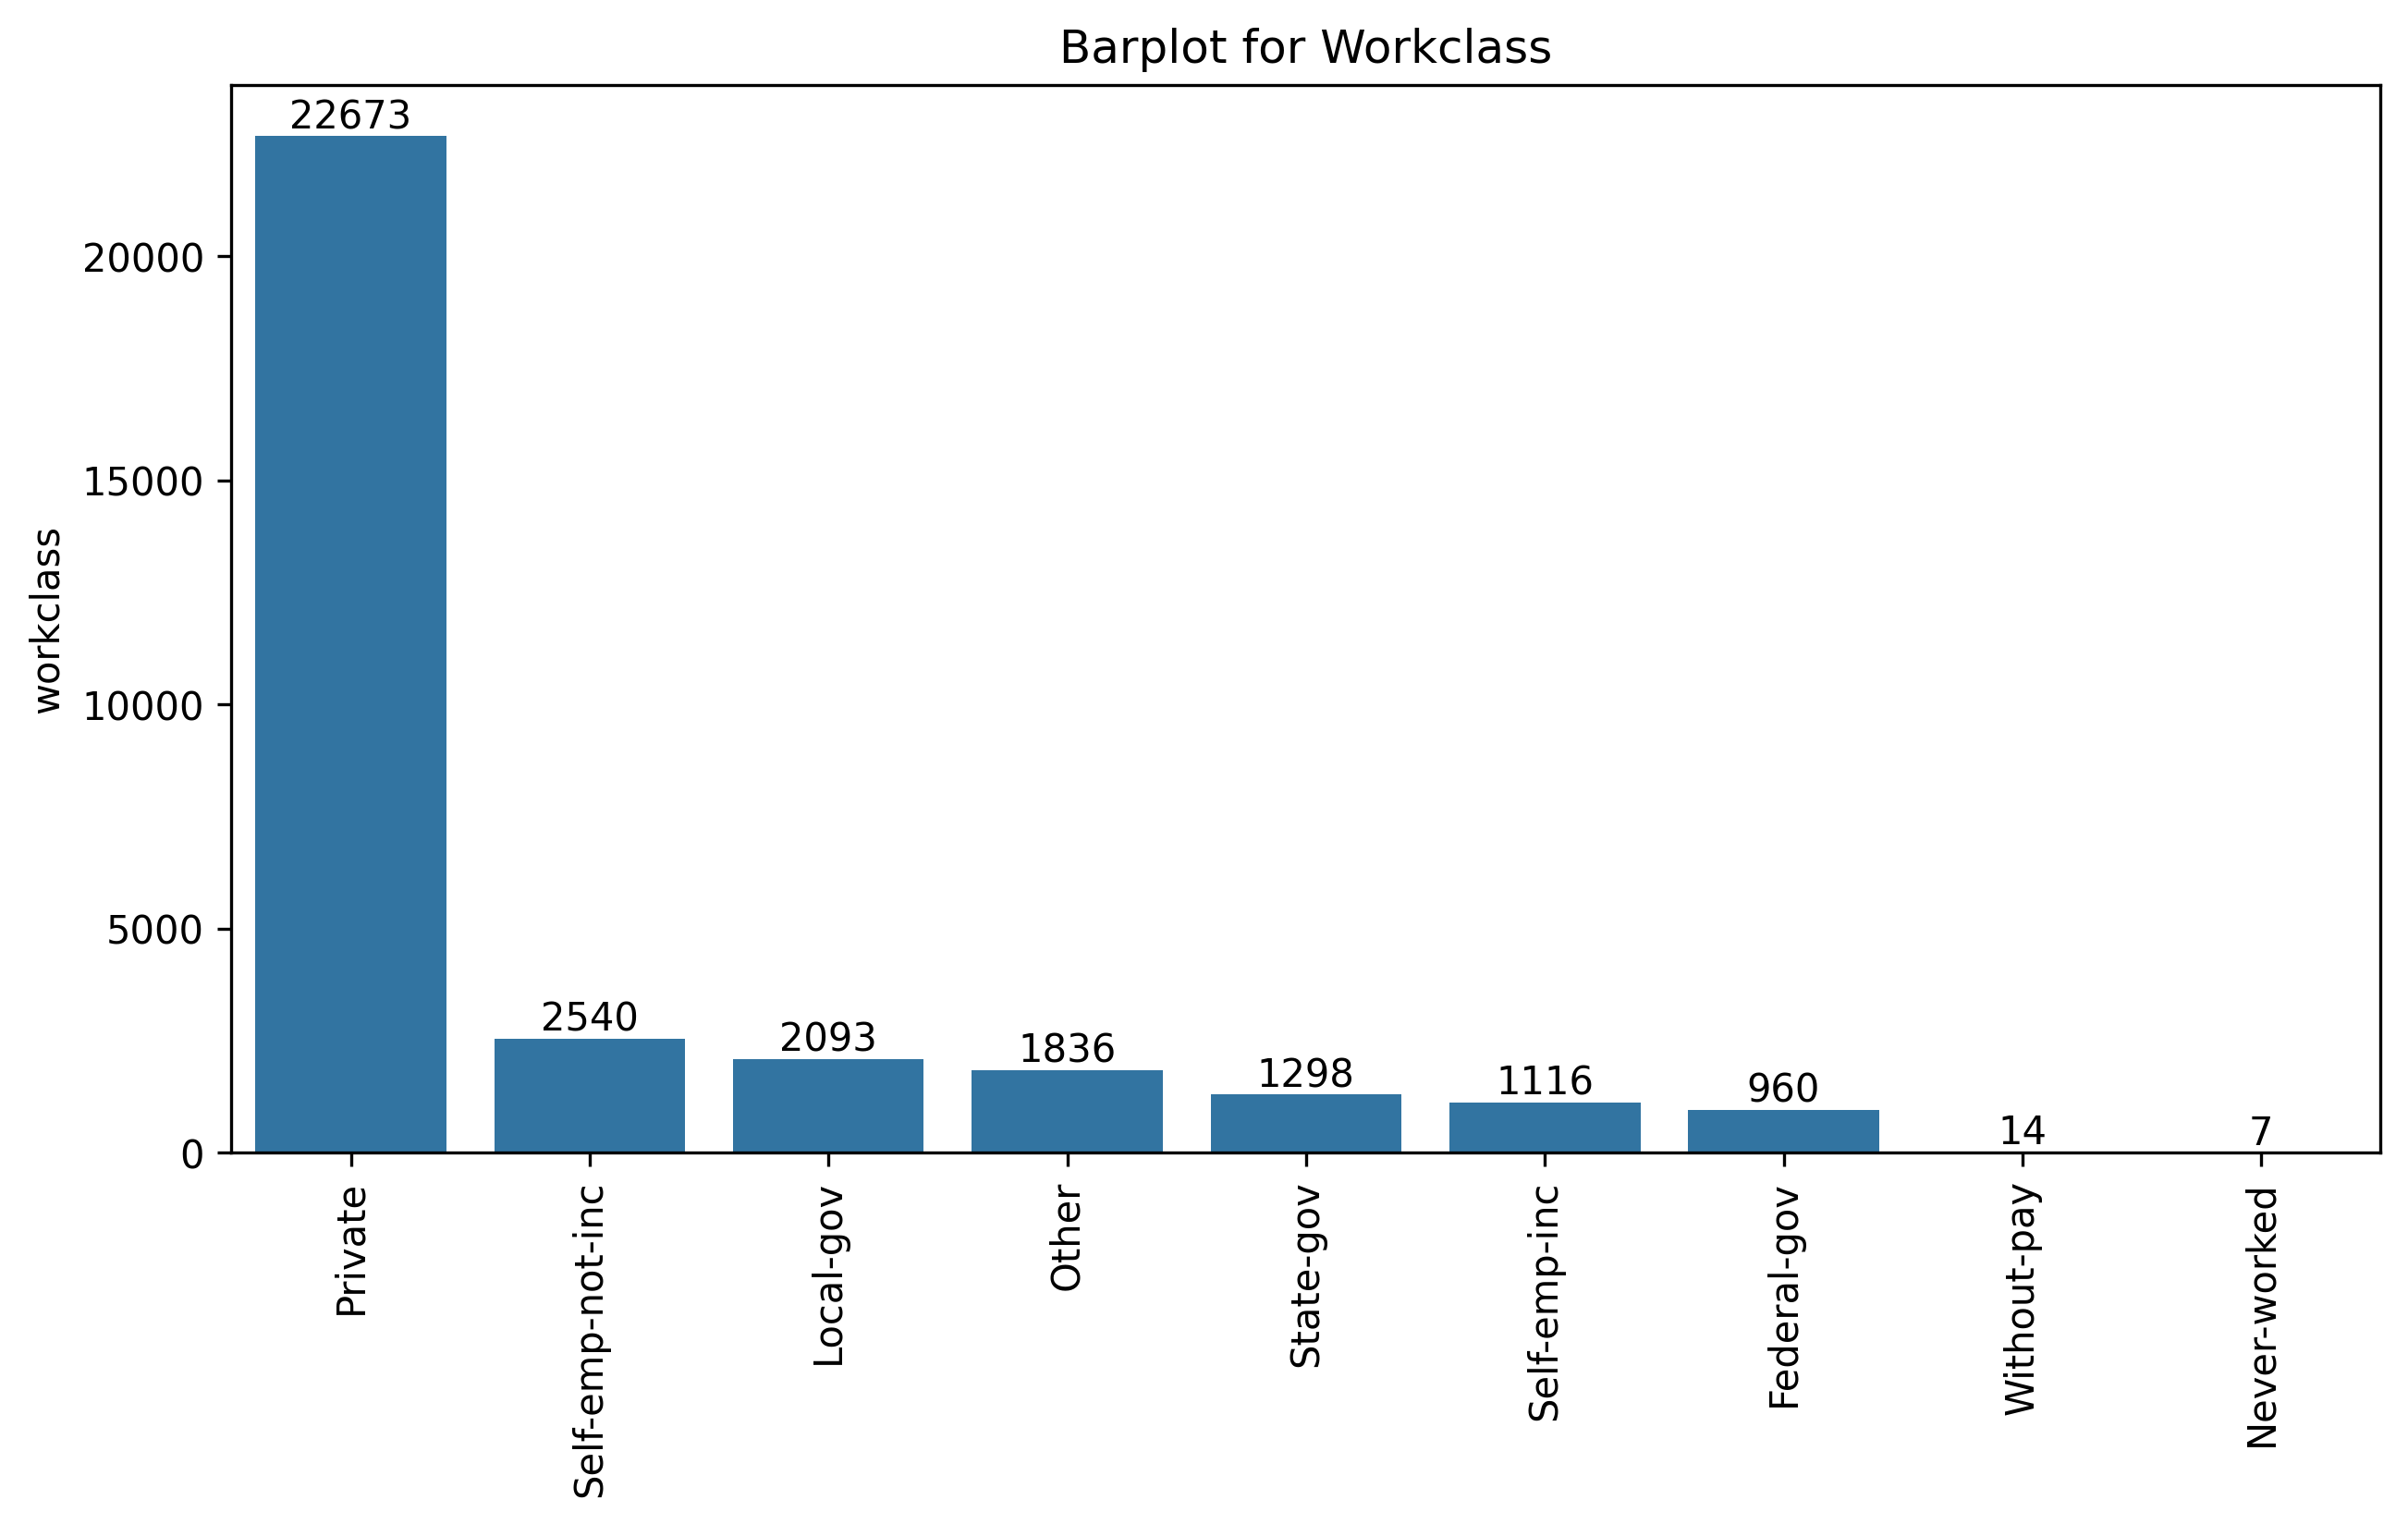

In [13]:
ax=sns.barplot(adult['workclass'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Workclass')
for i in ax.containers:
    ax.bar_label(i,)

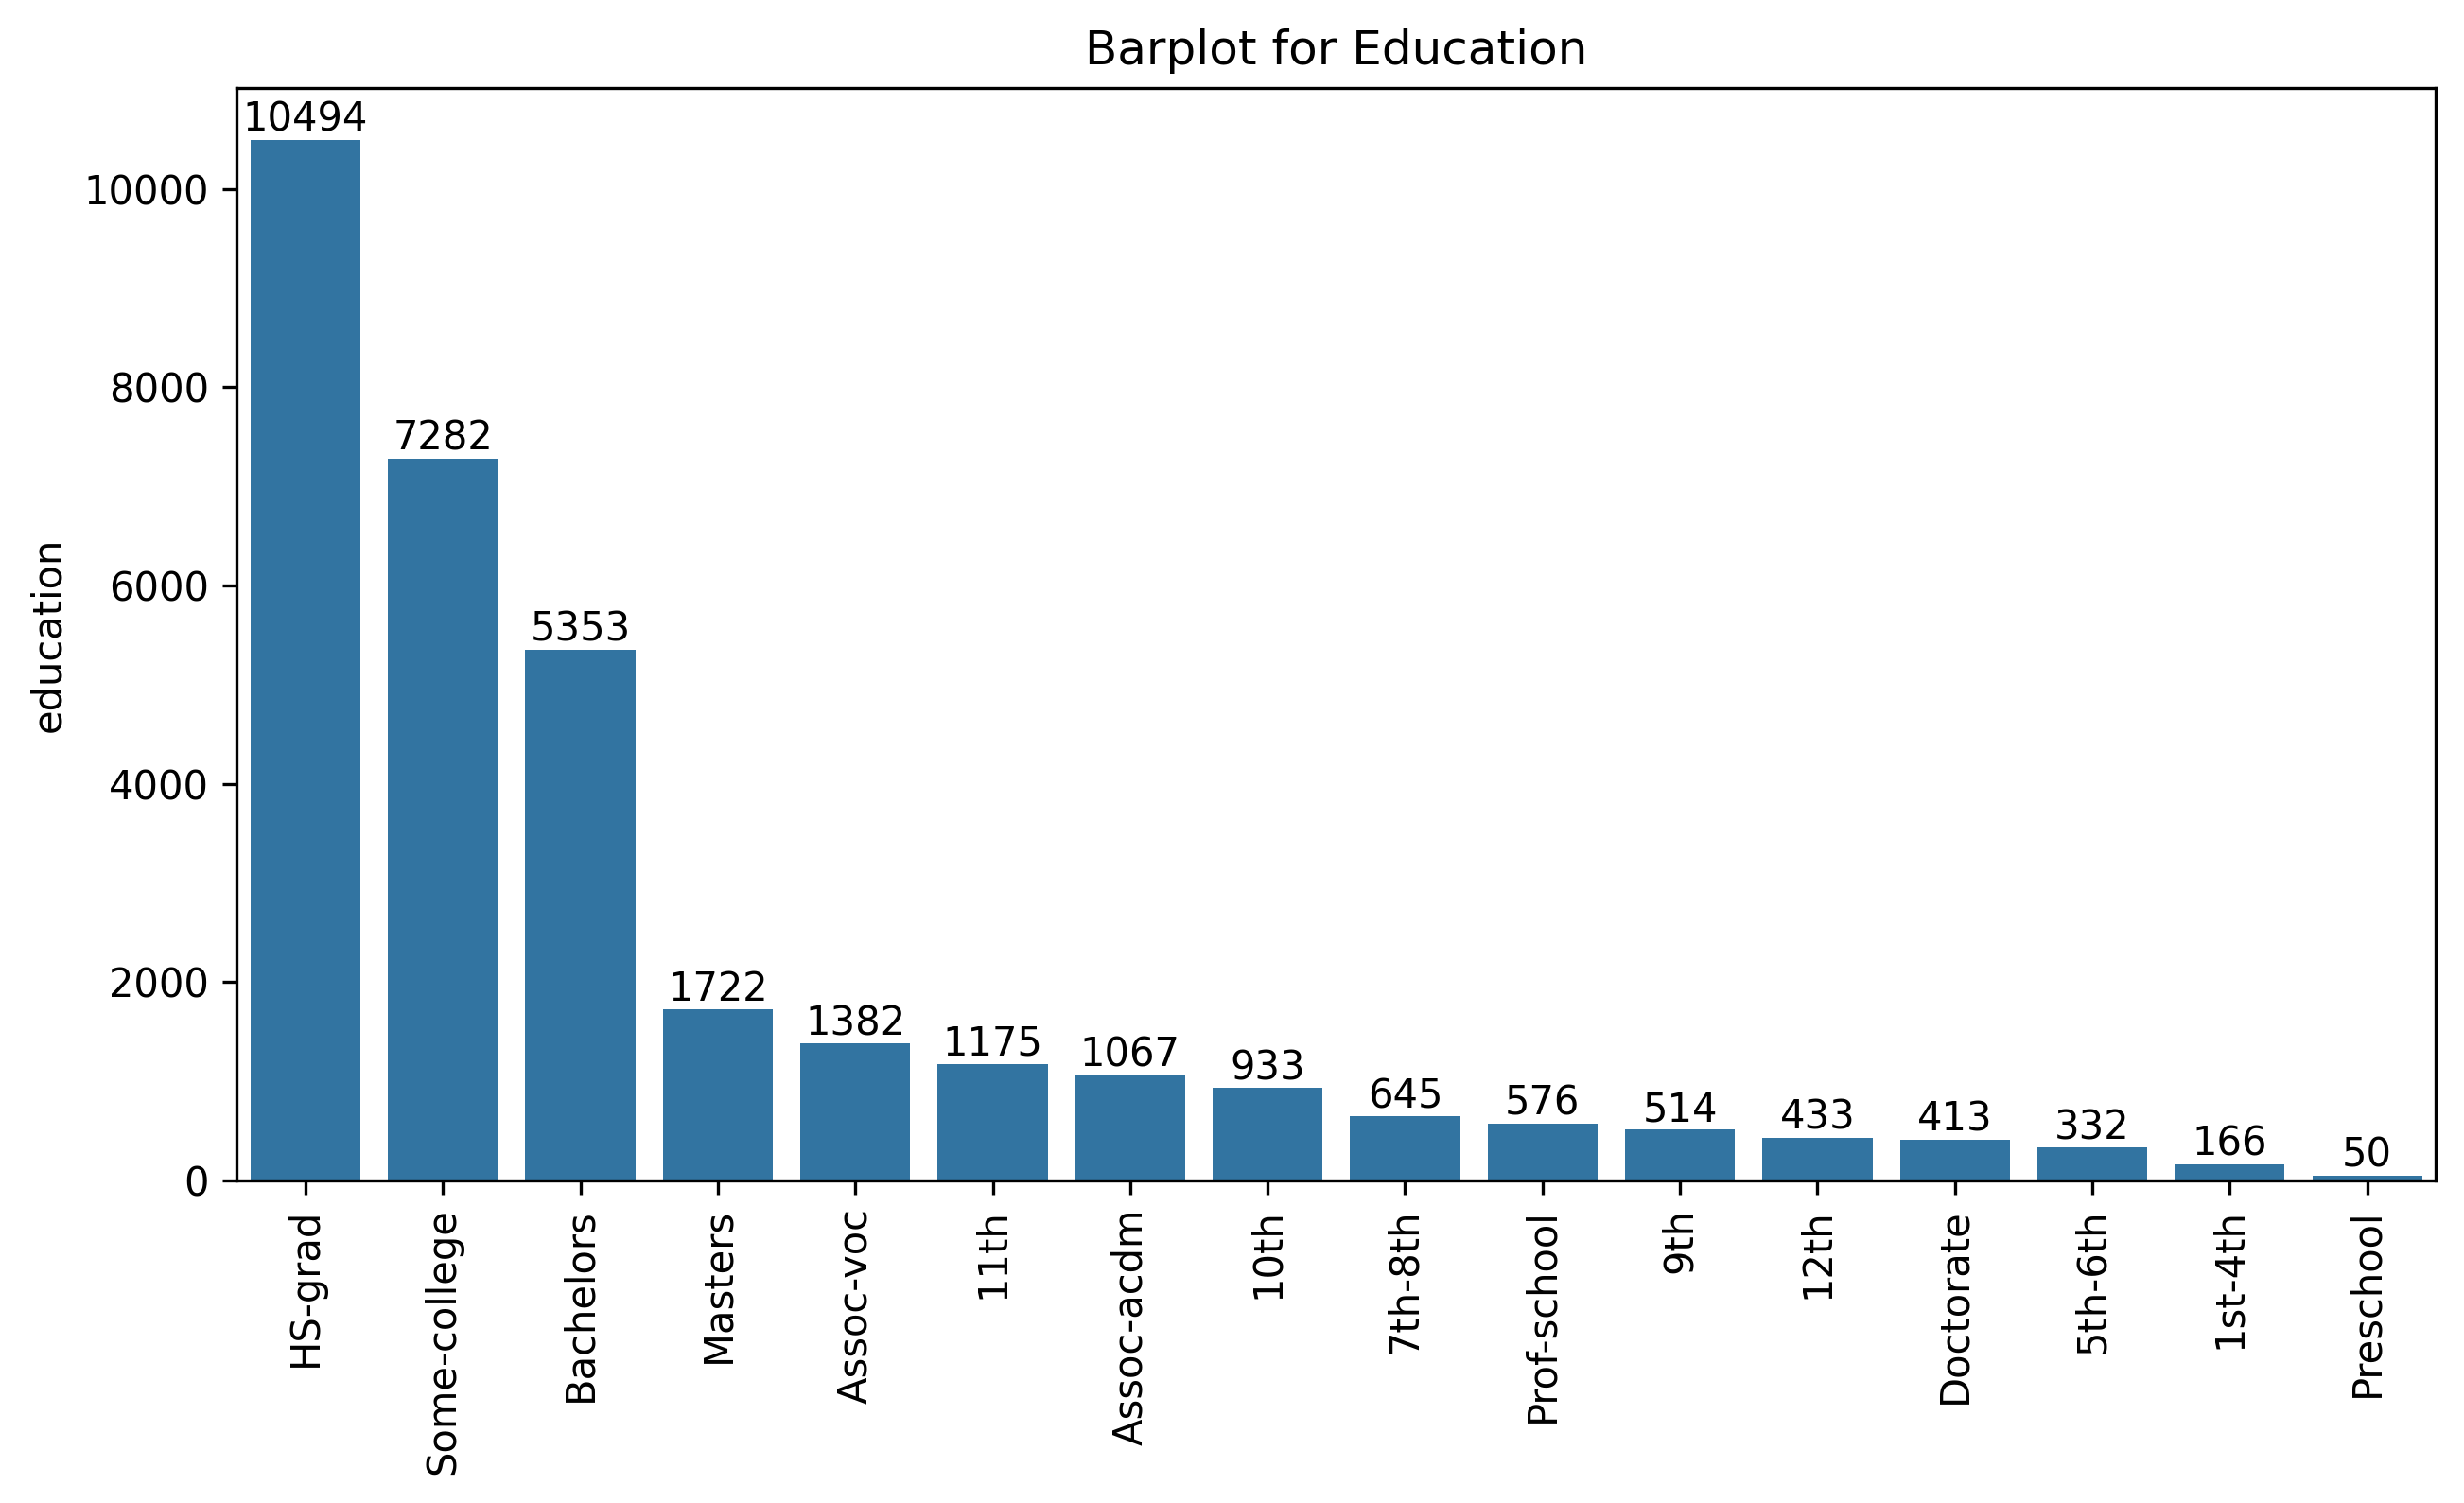

In [14]:
ax=sns.barplot(adult['education'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Education')
for i in ax.containers:
    ax.bar_label(i,)

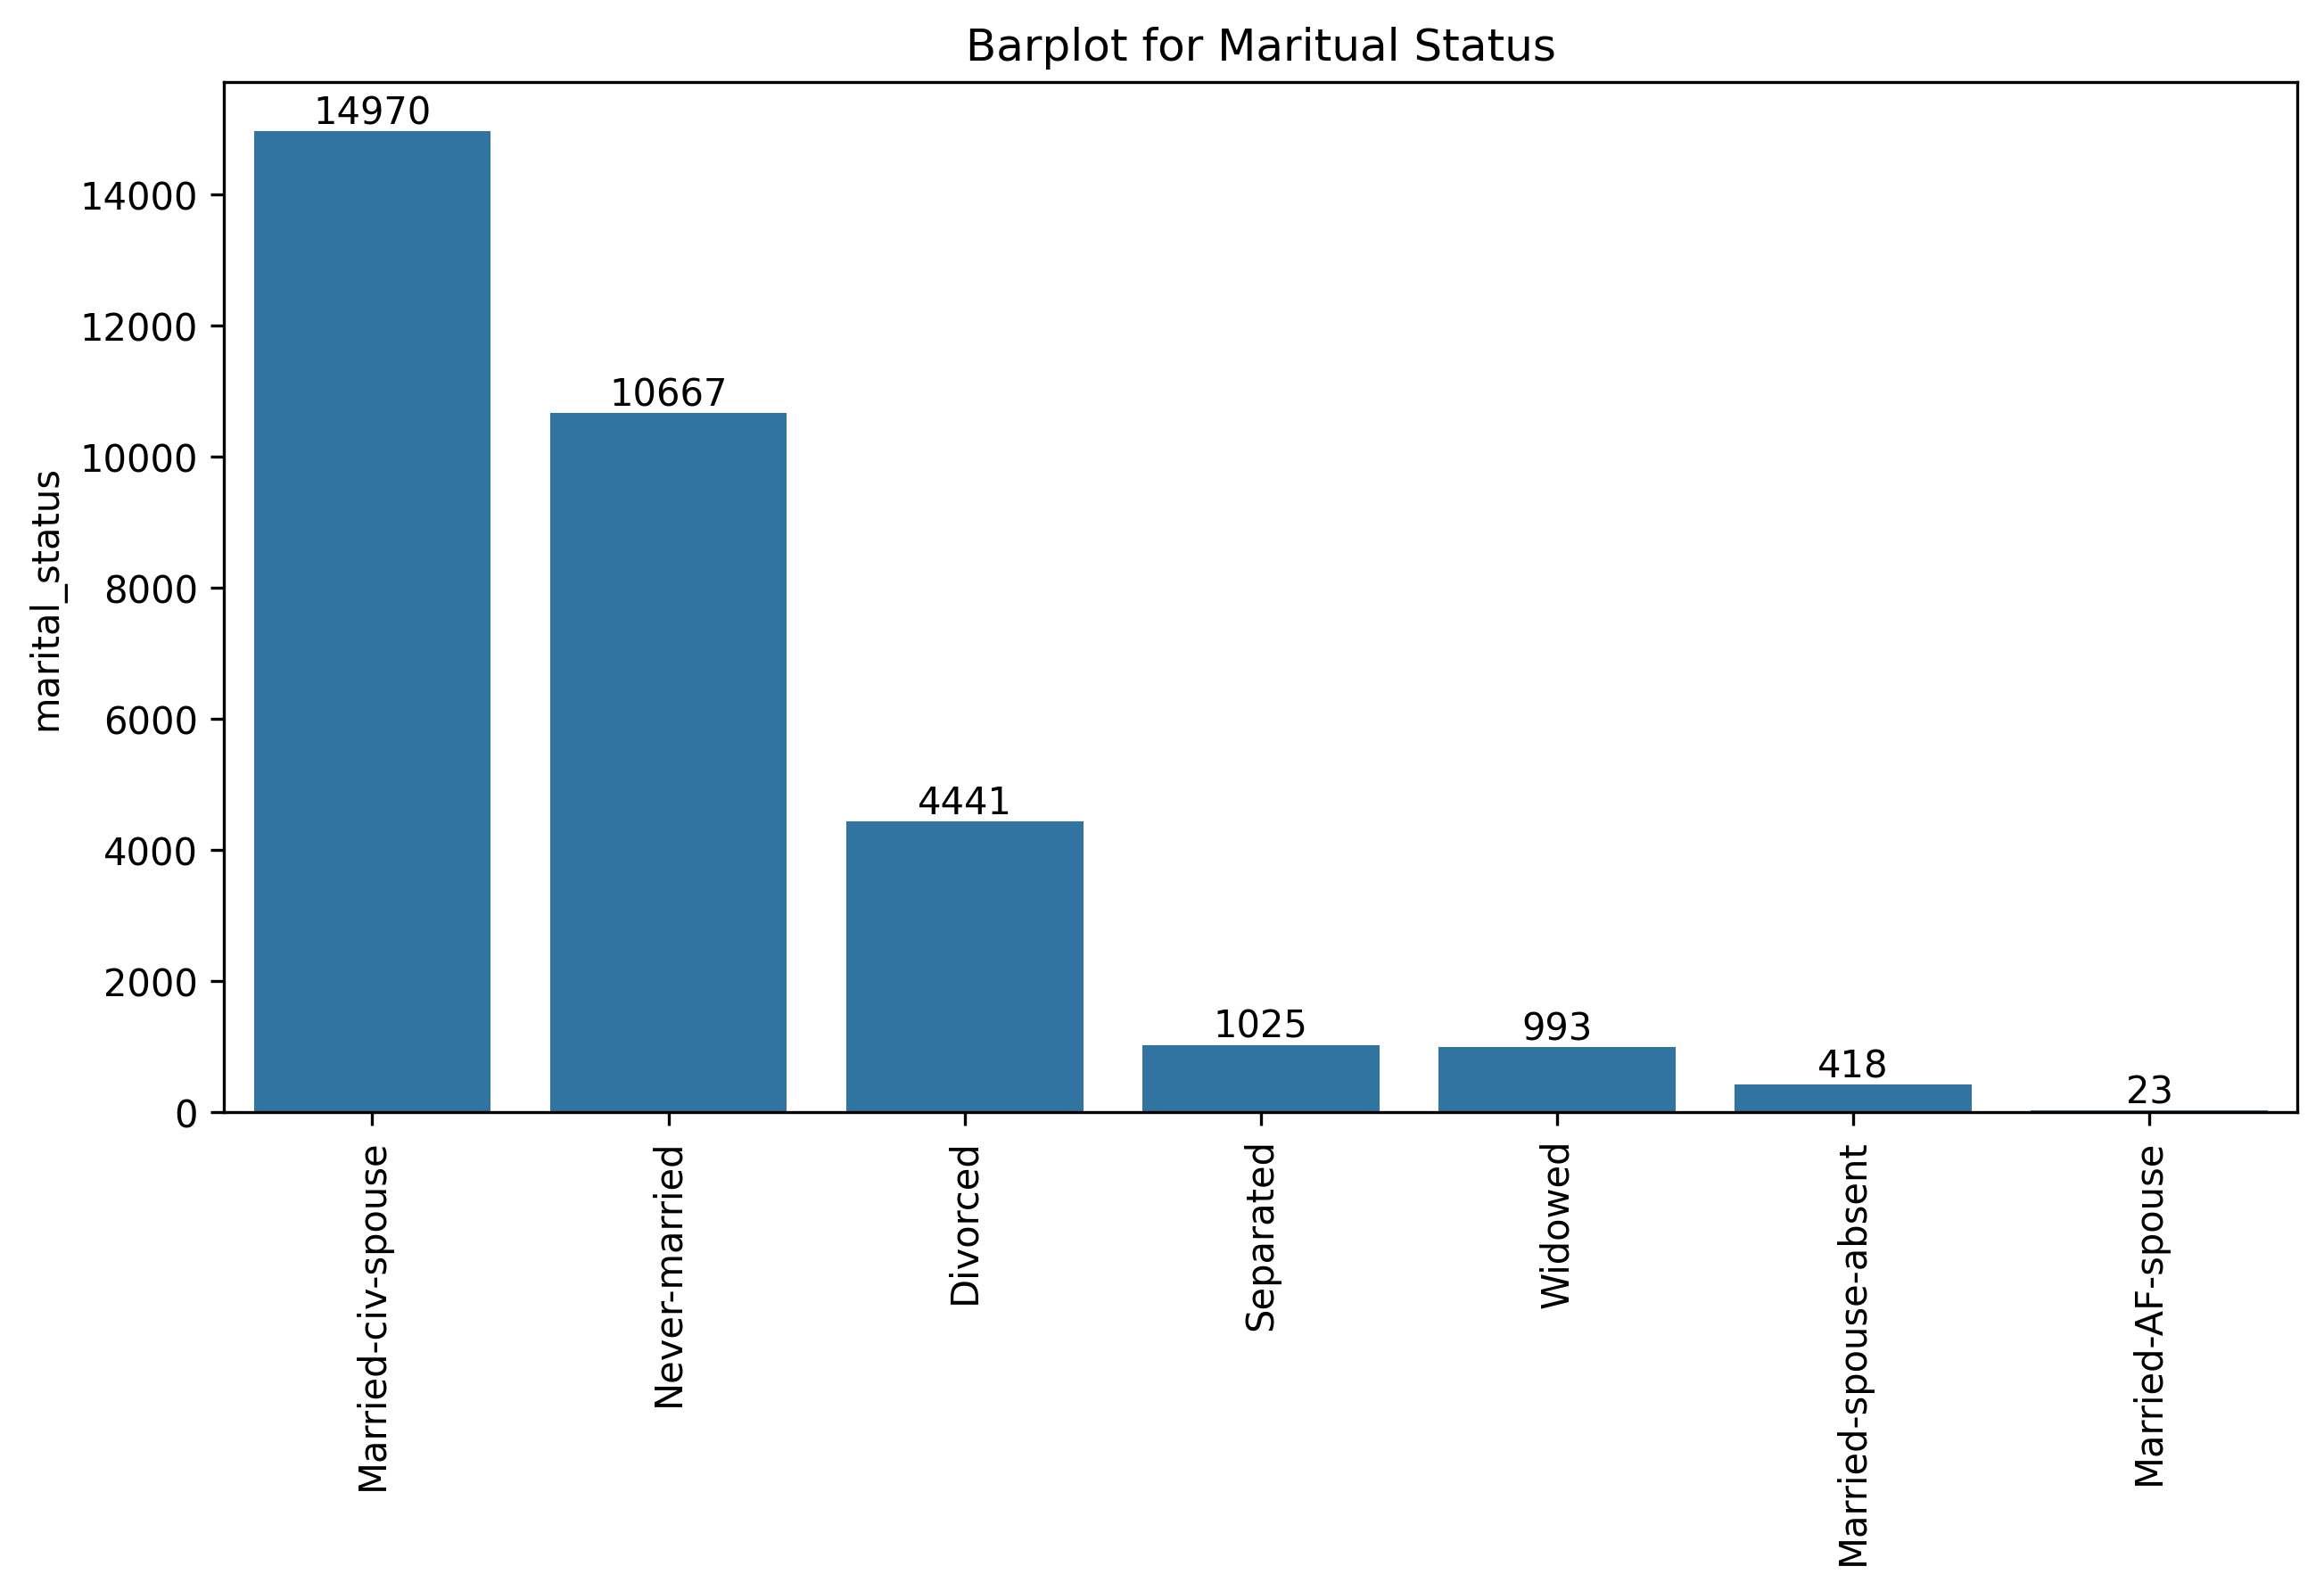

In [15]:
ax=sns.barplot(adult['marital_status'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Maritual Status')
for i in ax.containers:
    ax.bar_label(i,)

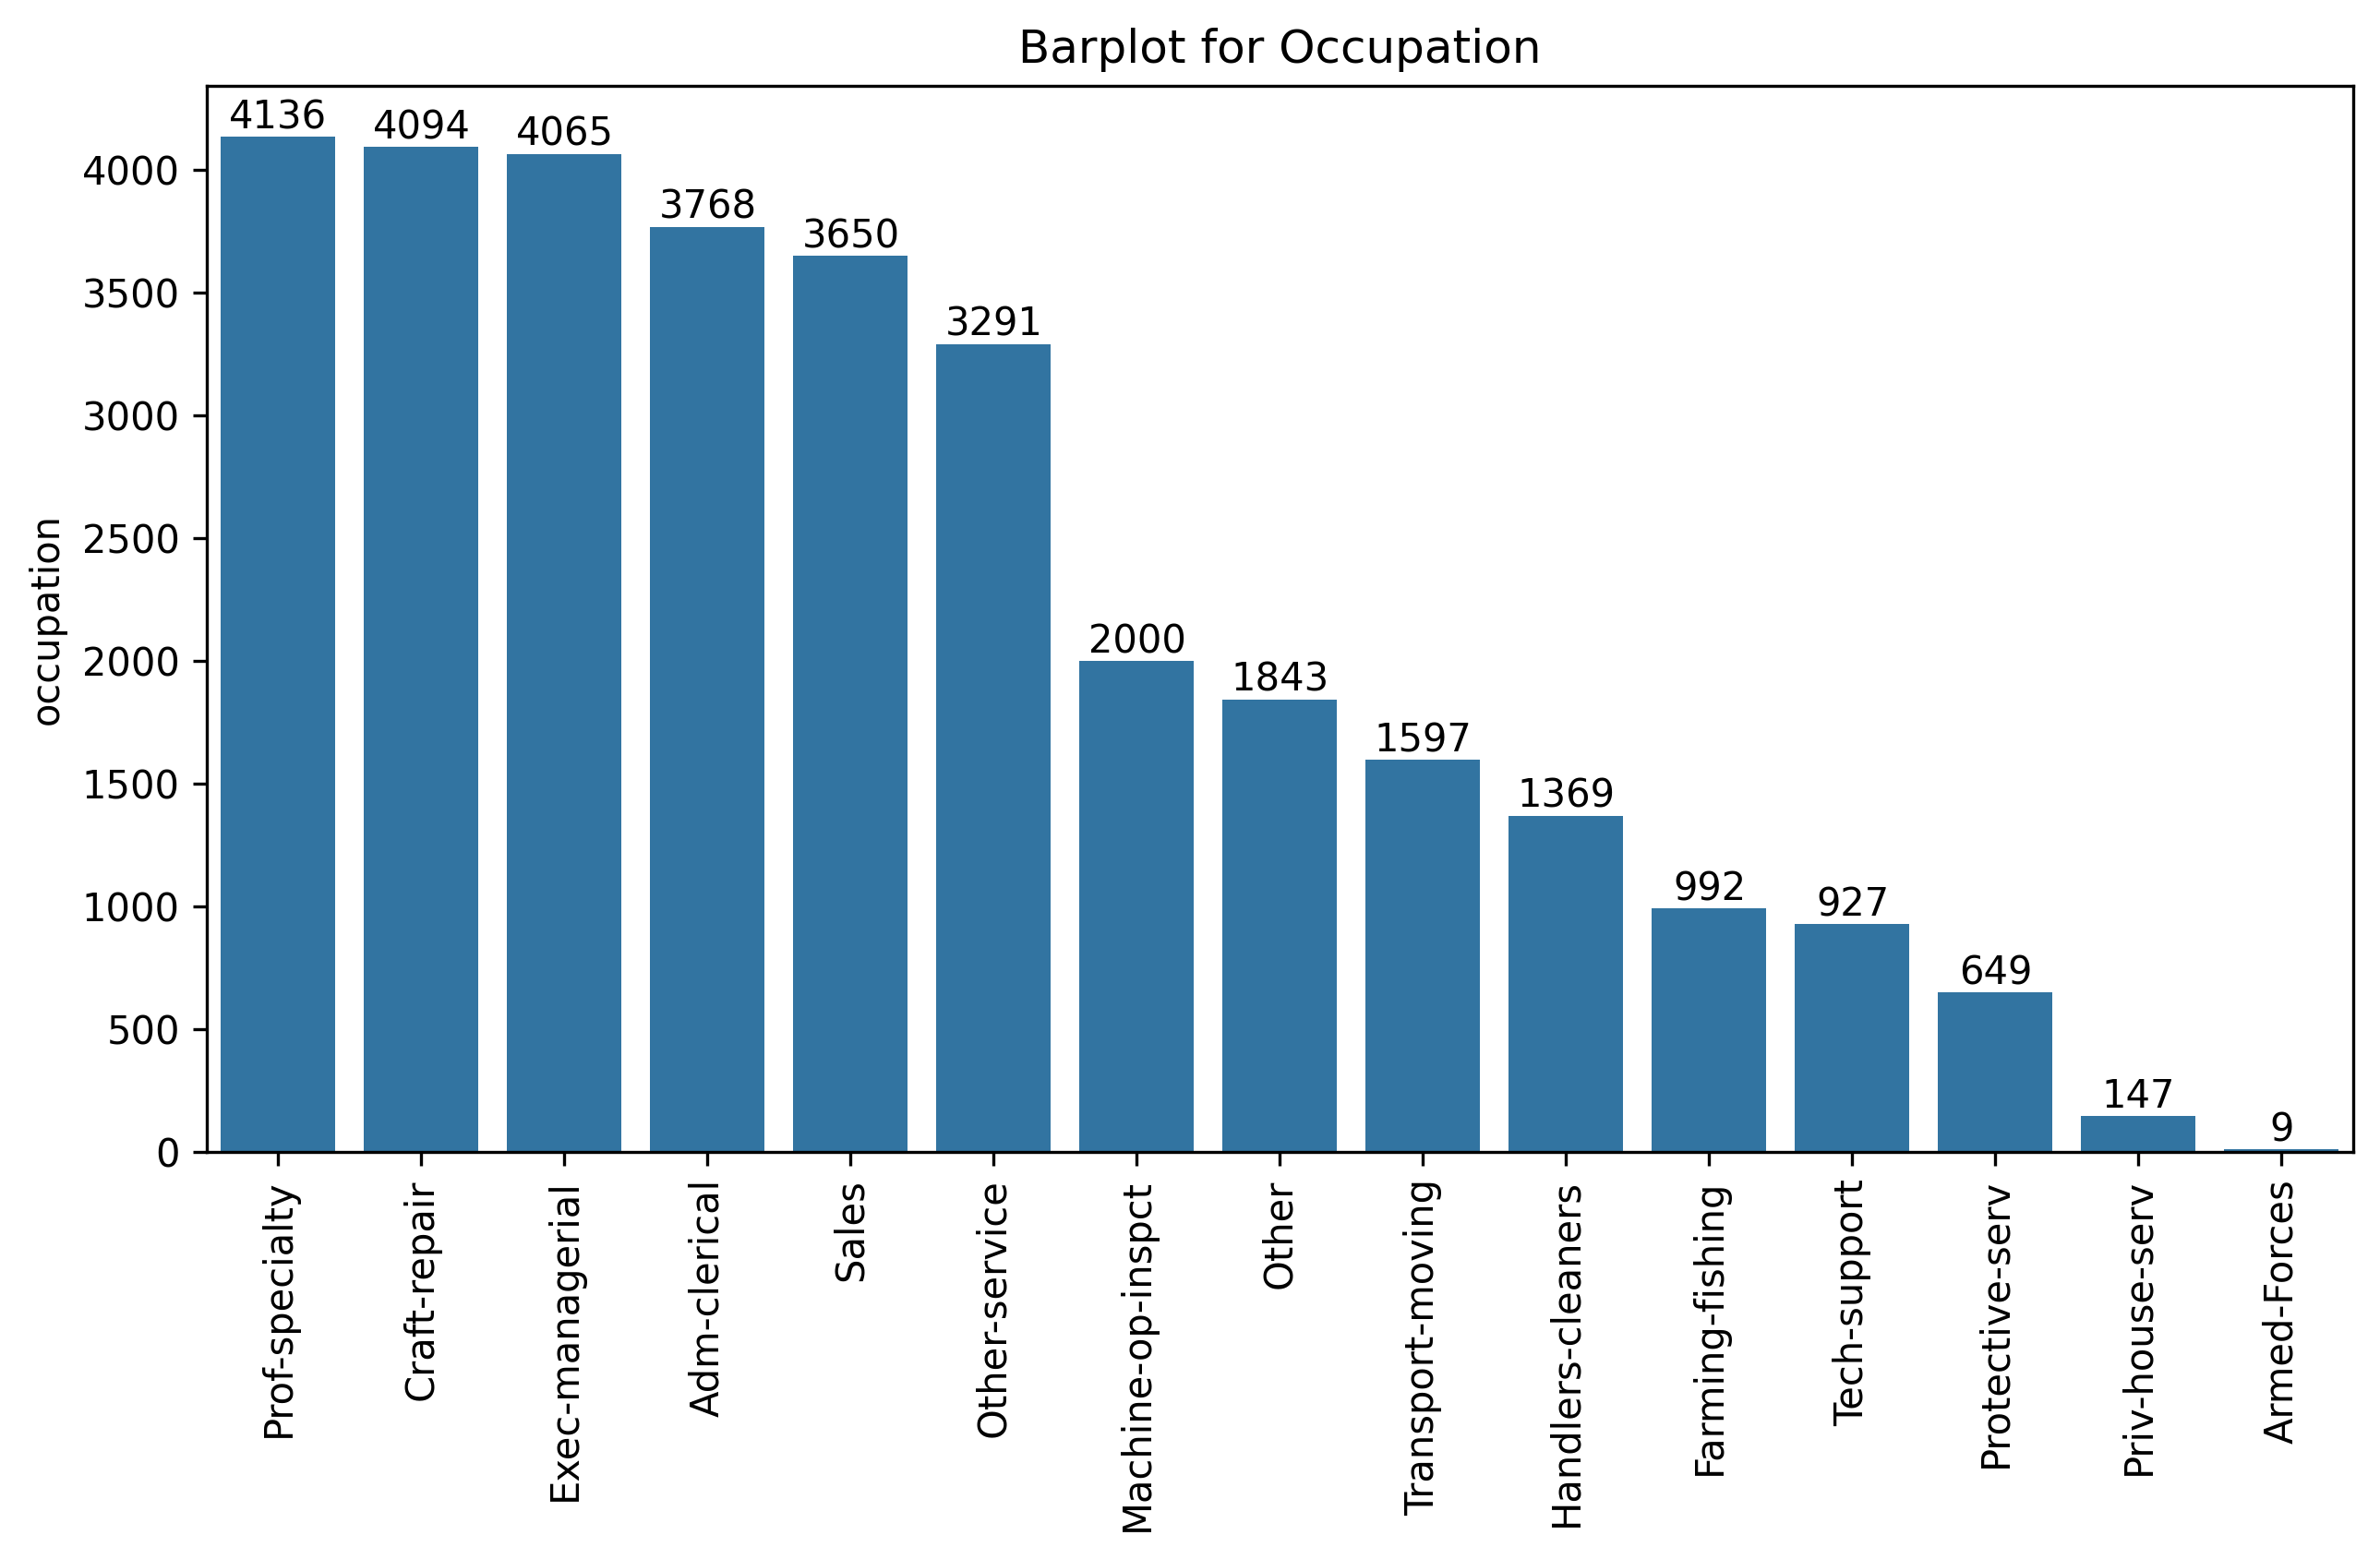

In [16]:
ax=sns.barplot(adult['occupation'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Occupation')
for i in ax.containers:
    ax.bar_label(i,)

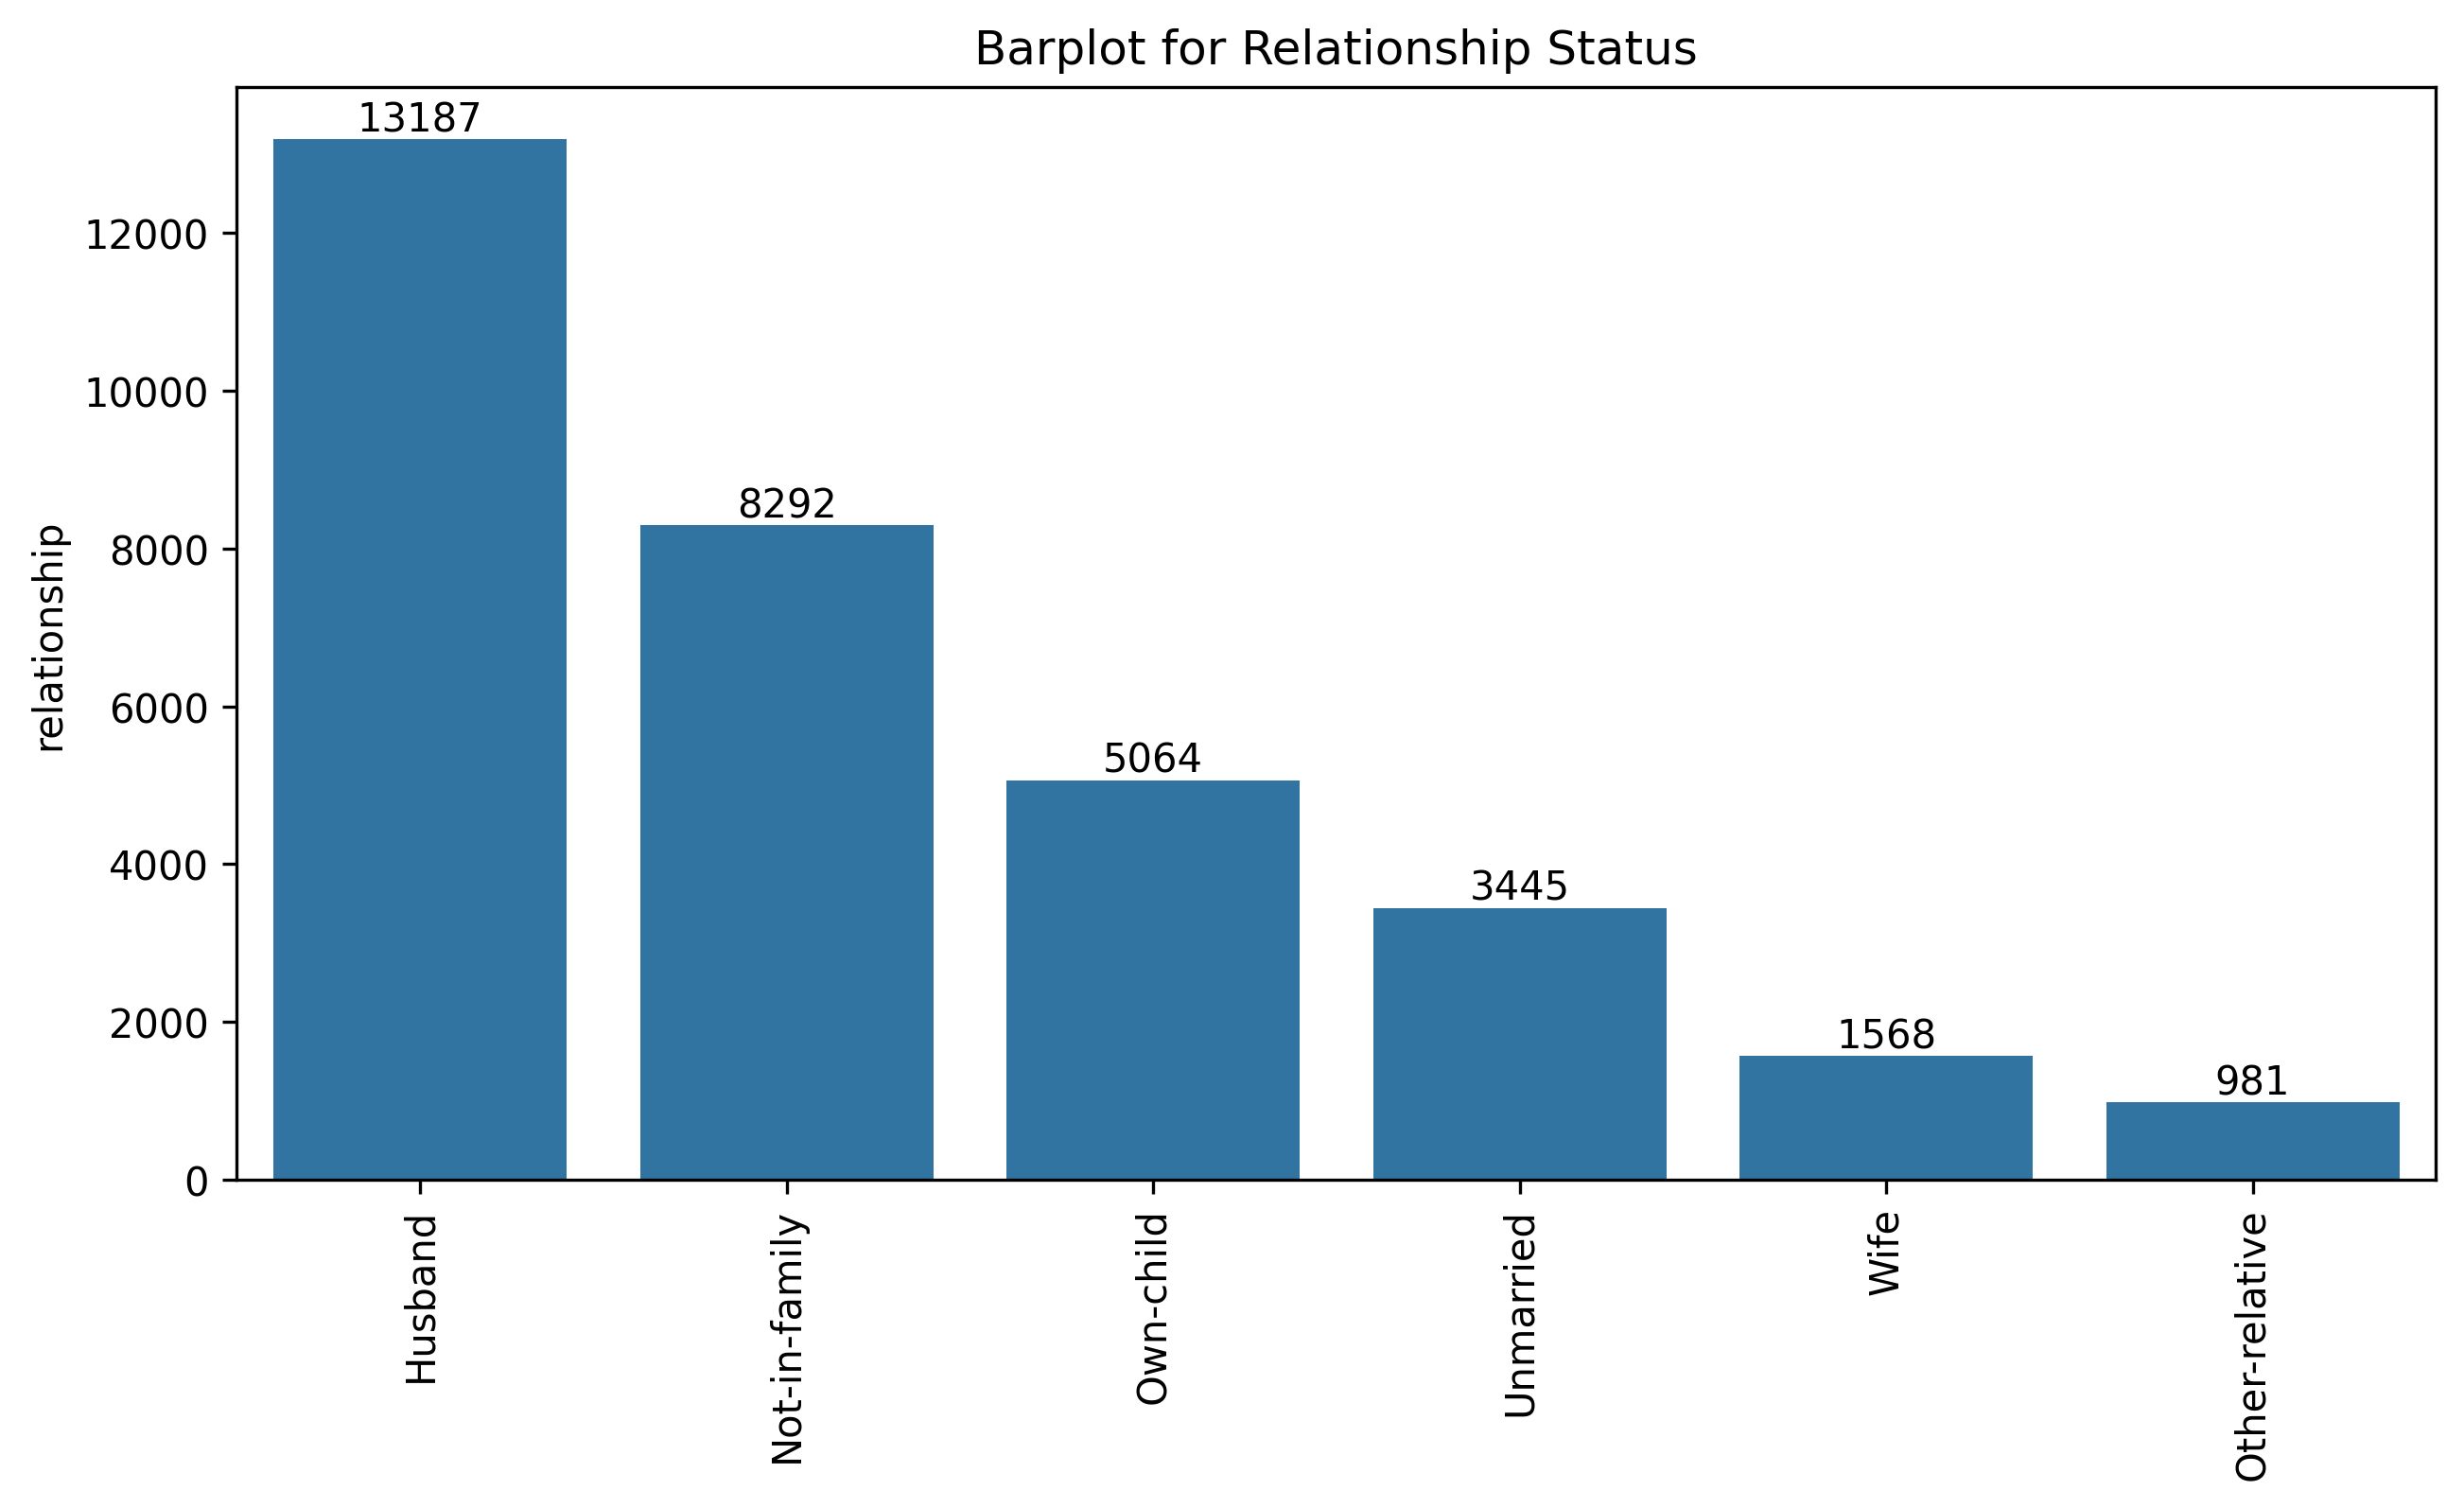

In [17]:
ax=sns.barplot(adult['relationship'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Relationship Status')
for i in ax.containers:
    ax.bar_label(i,)

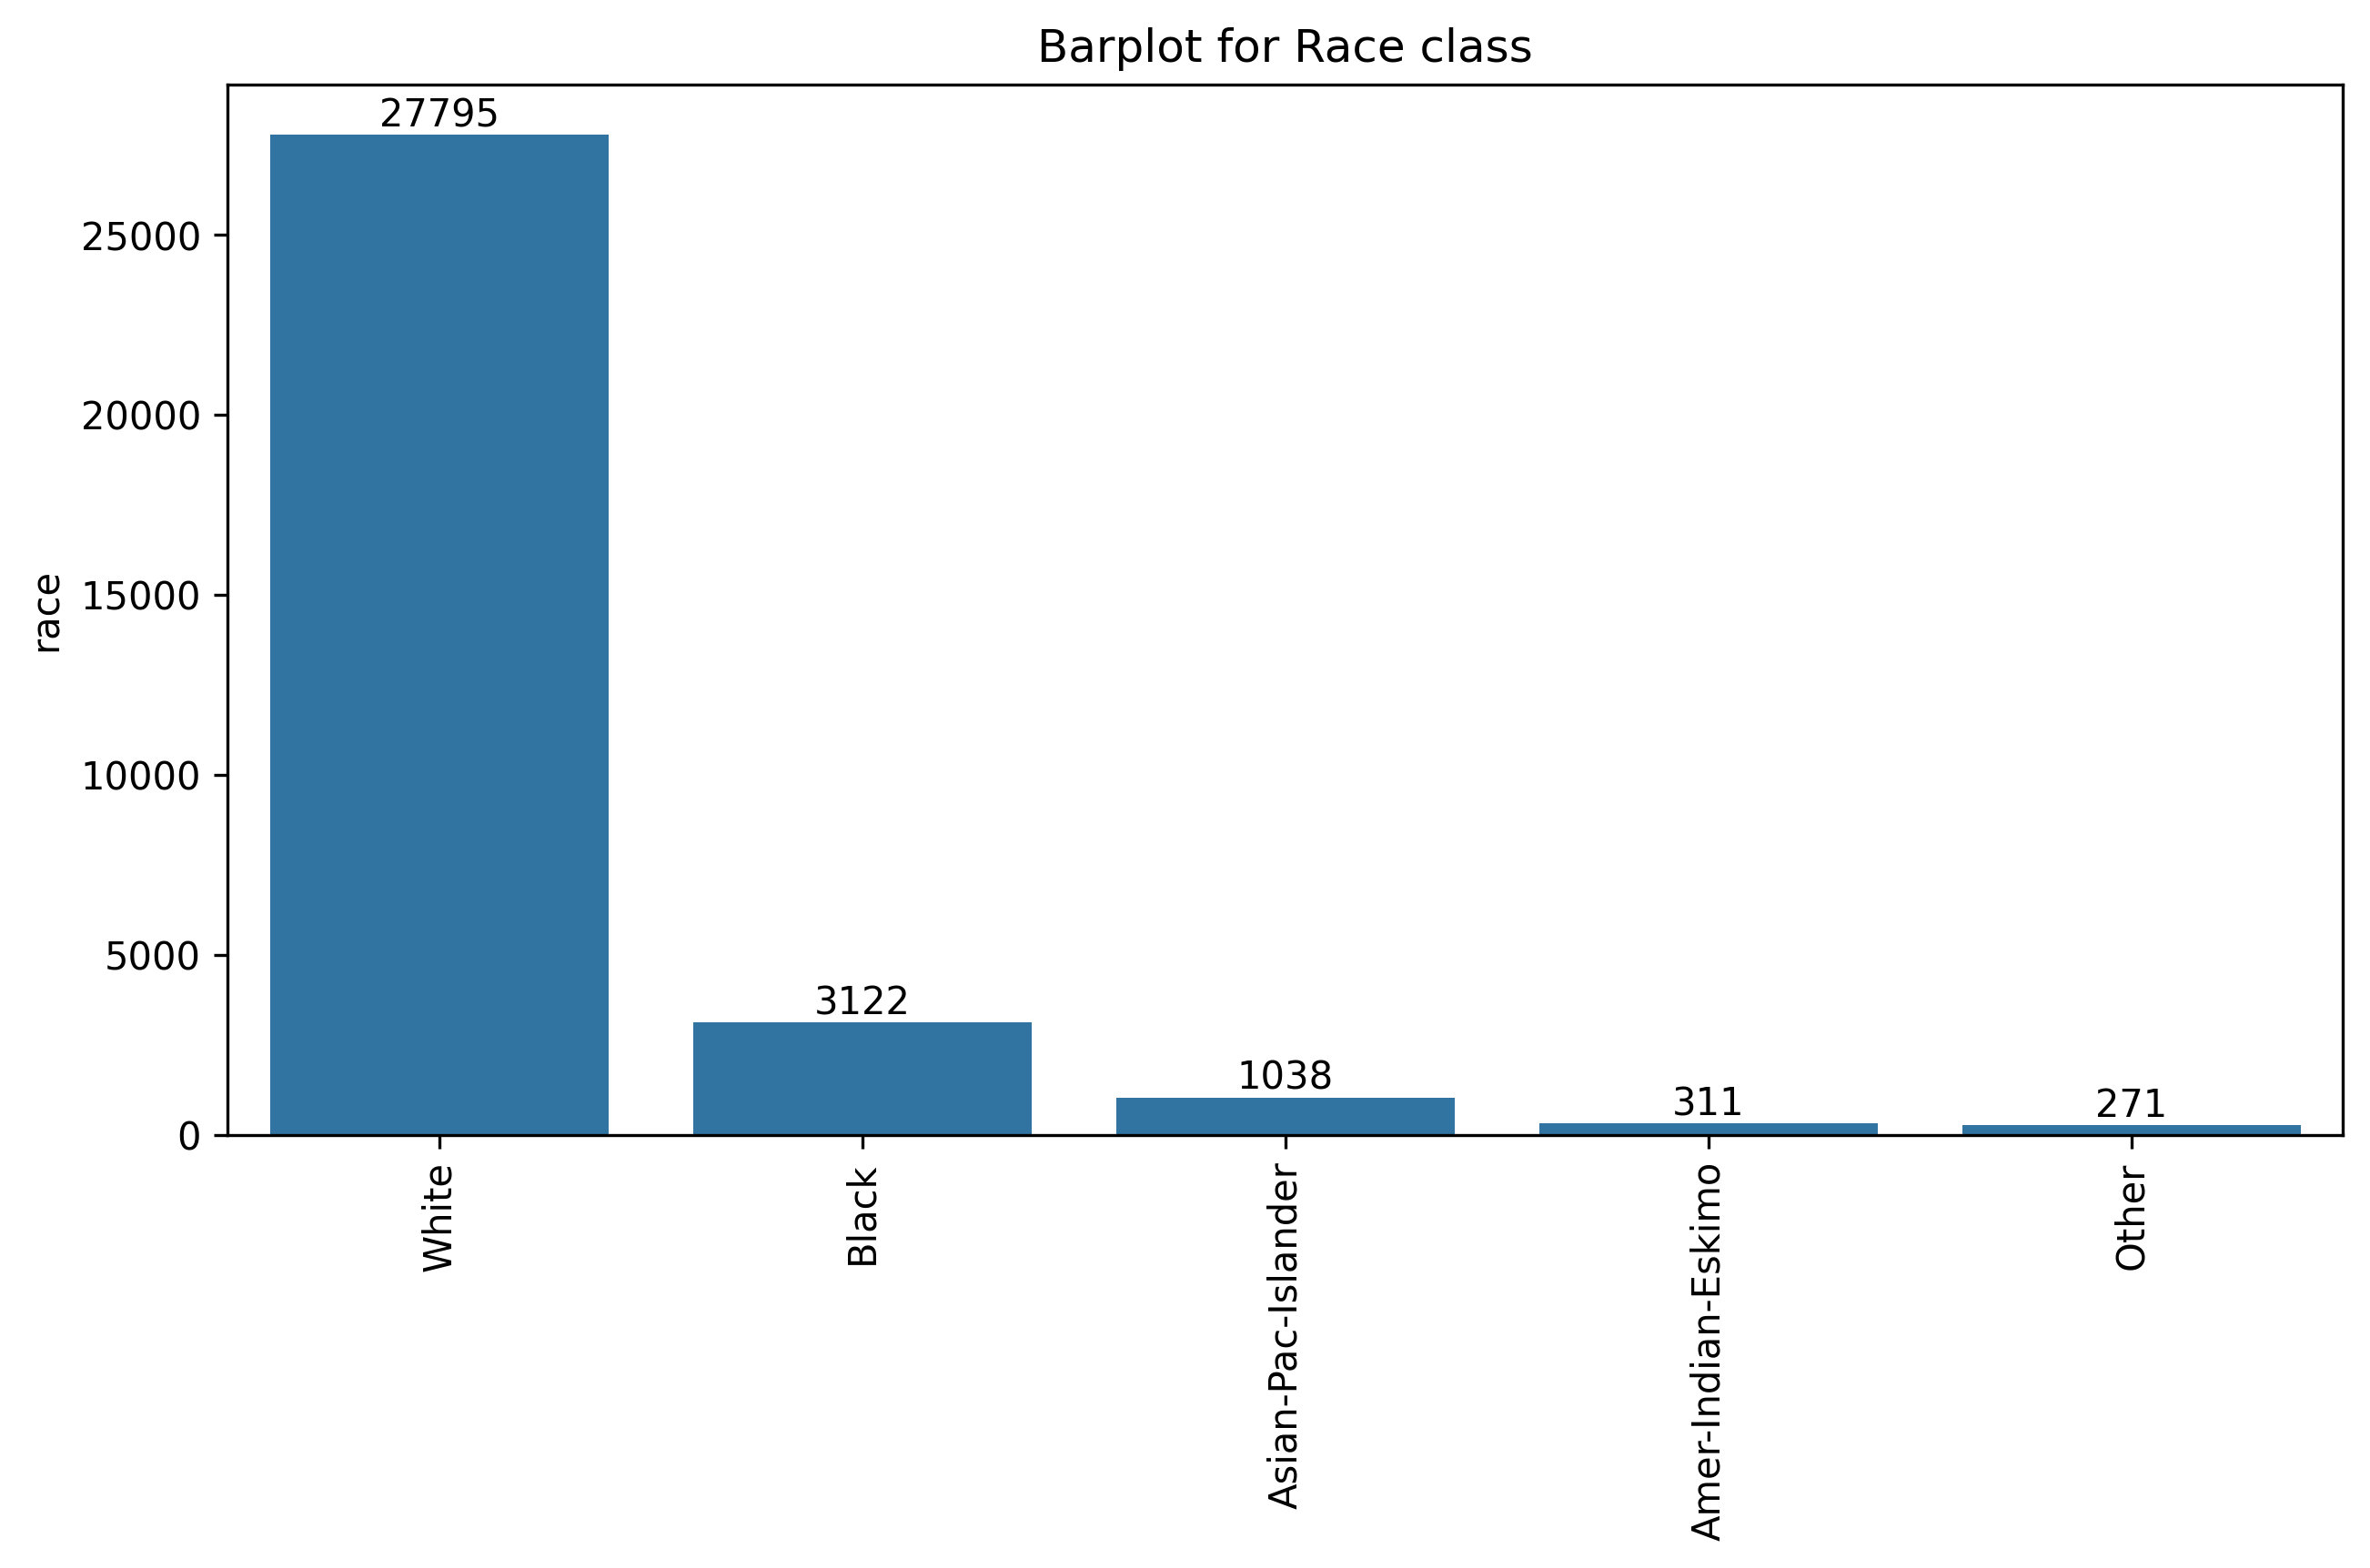

In [18]:
ax=sns.barplot(adult['race'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Race class')
for i in ax.containers:
    ax.bar_label(i,)

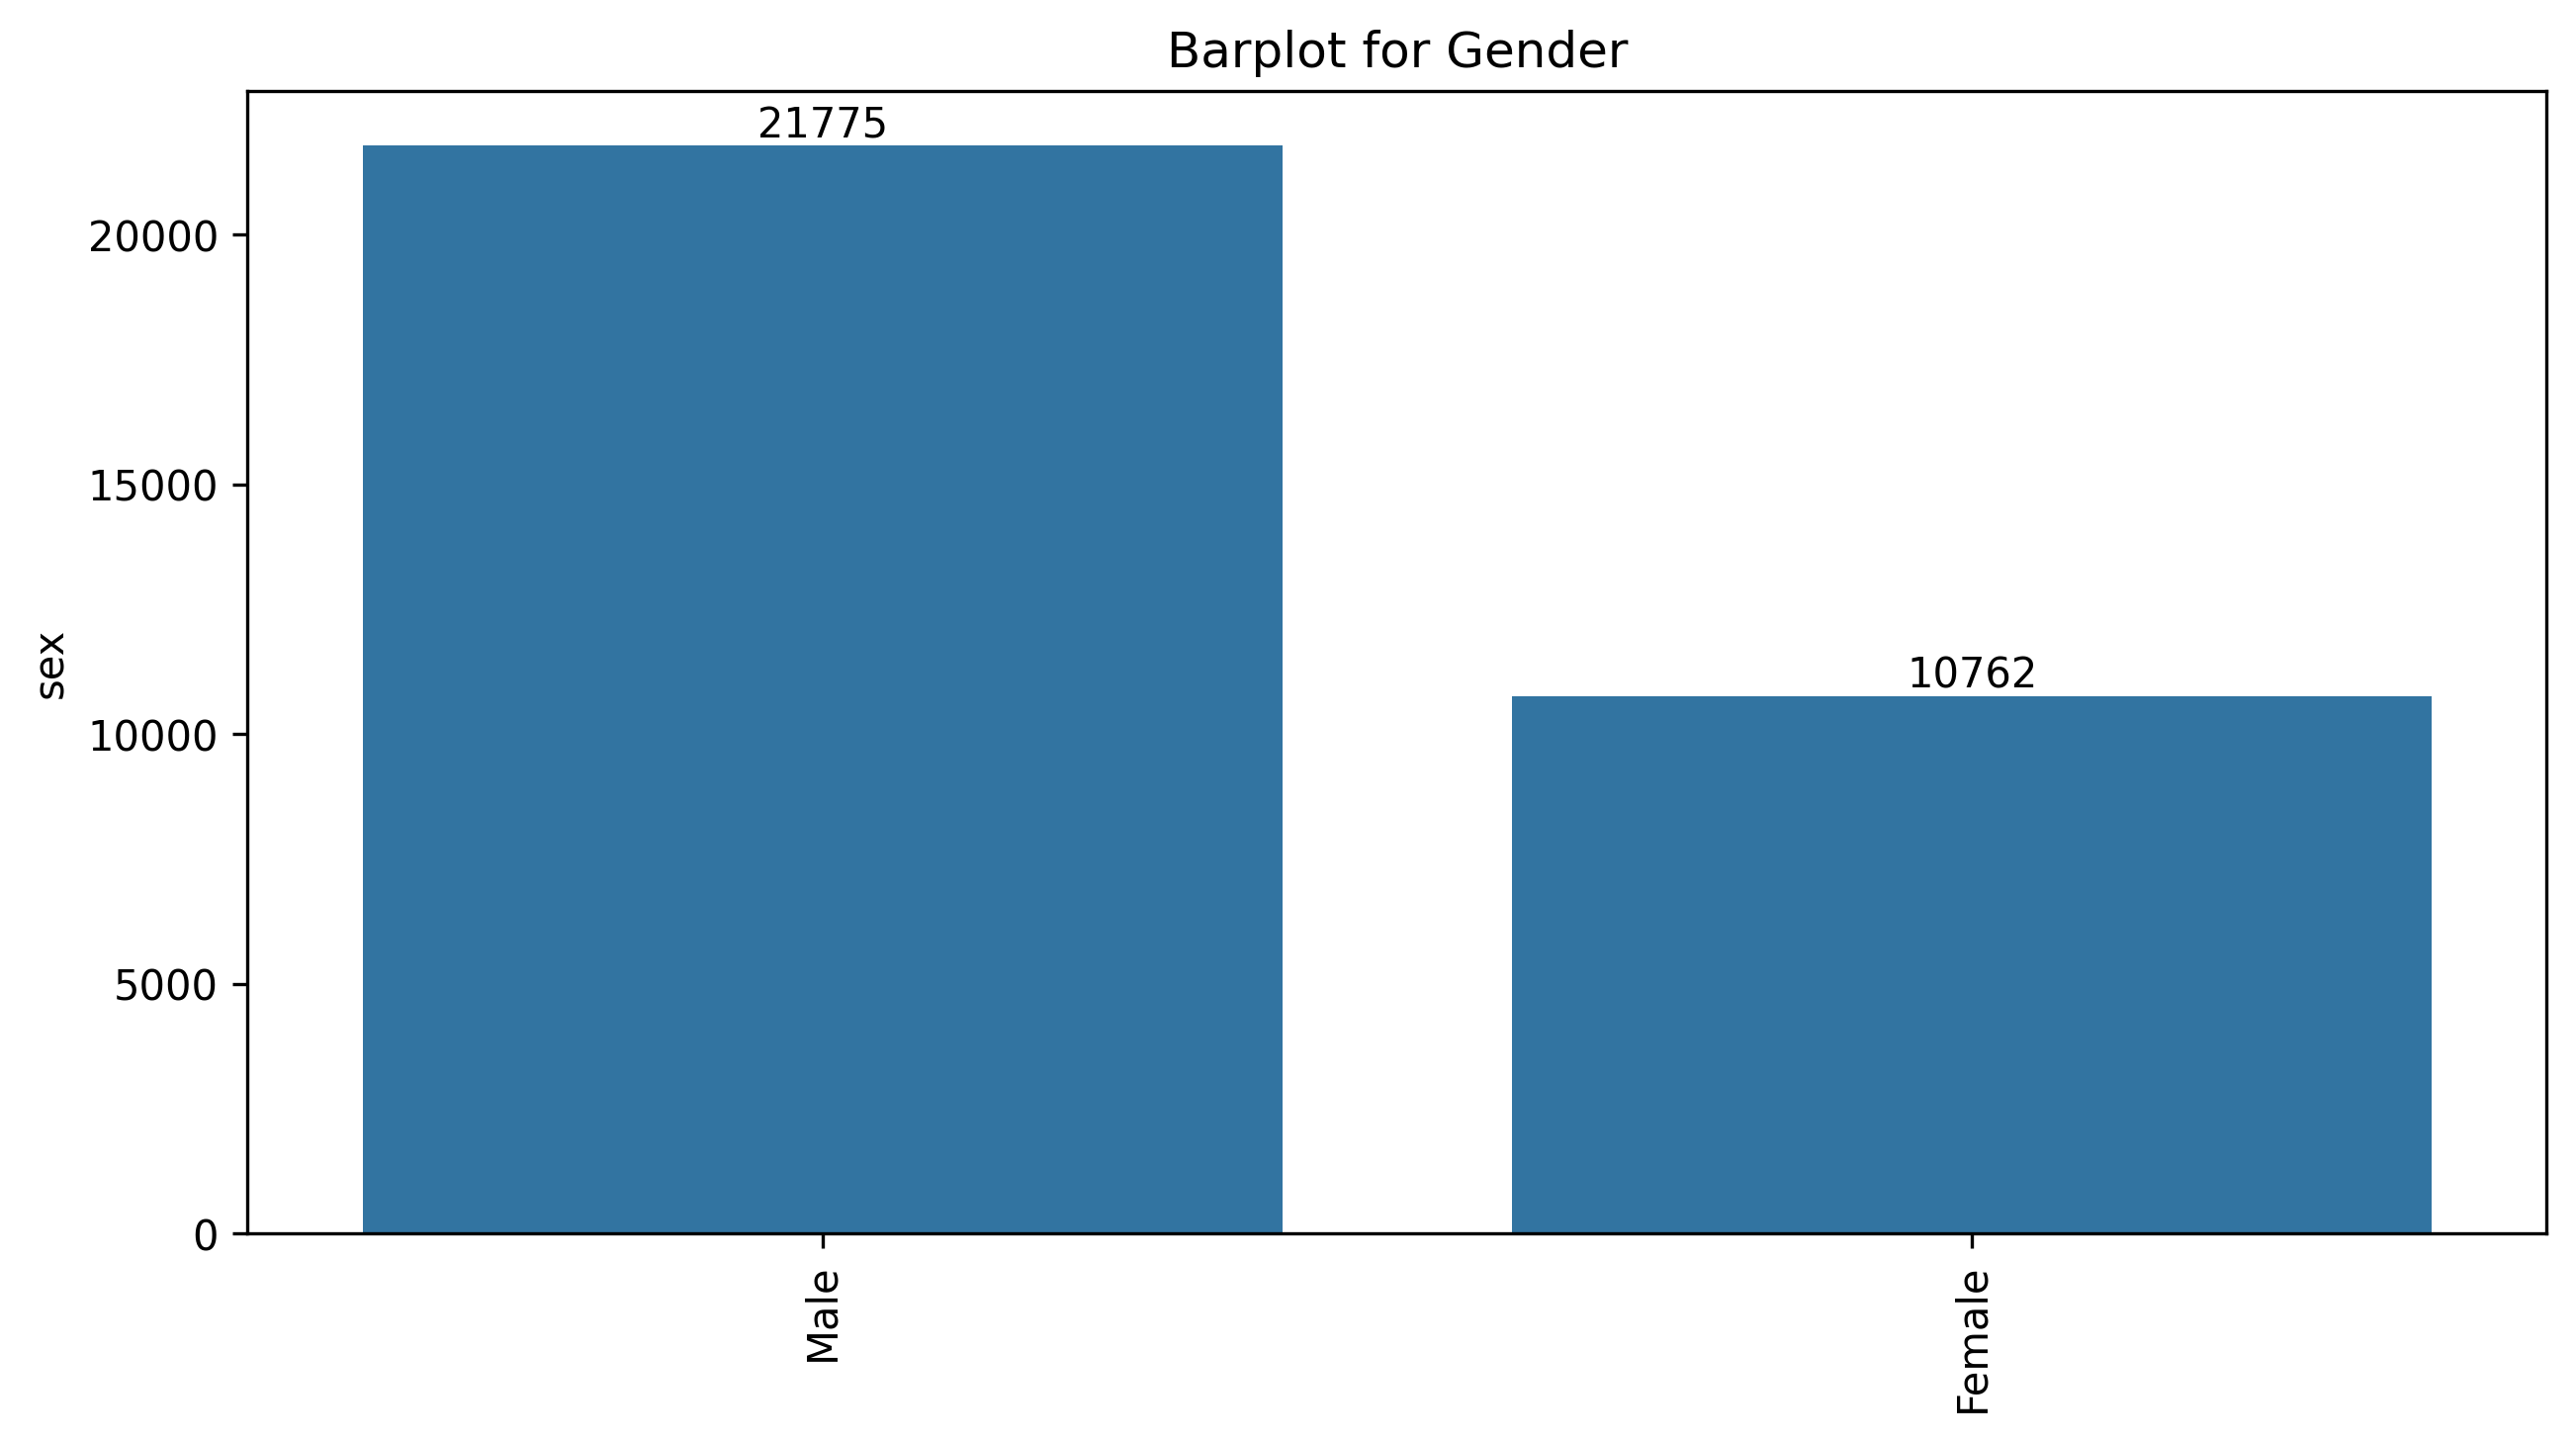

In [19]:
ax=sns.barplot(adult['sex'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Gender')
for i in ax.containers:
    ax.bar_label(i,)

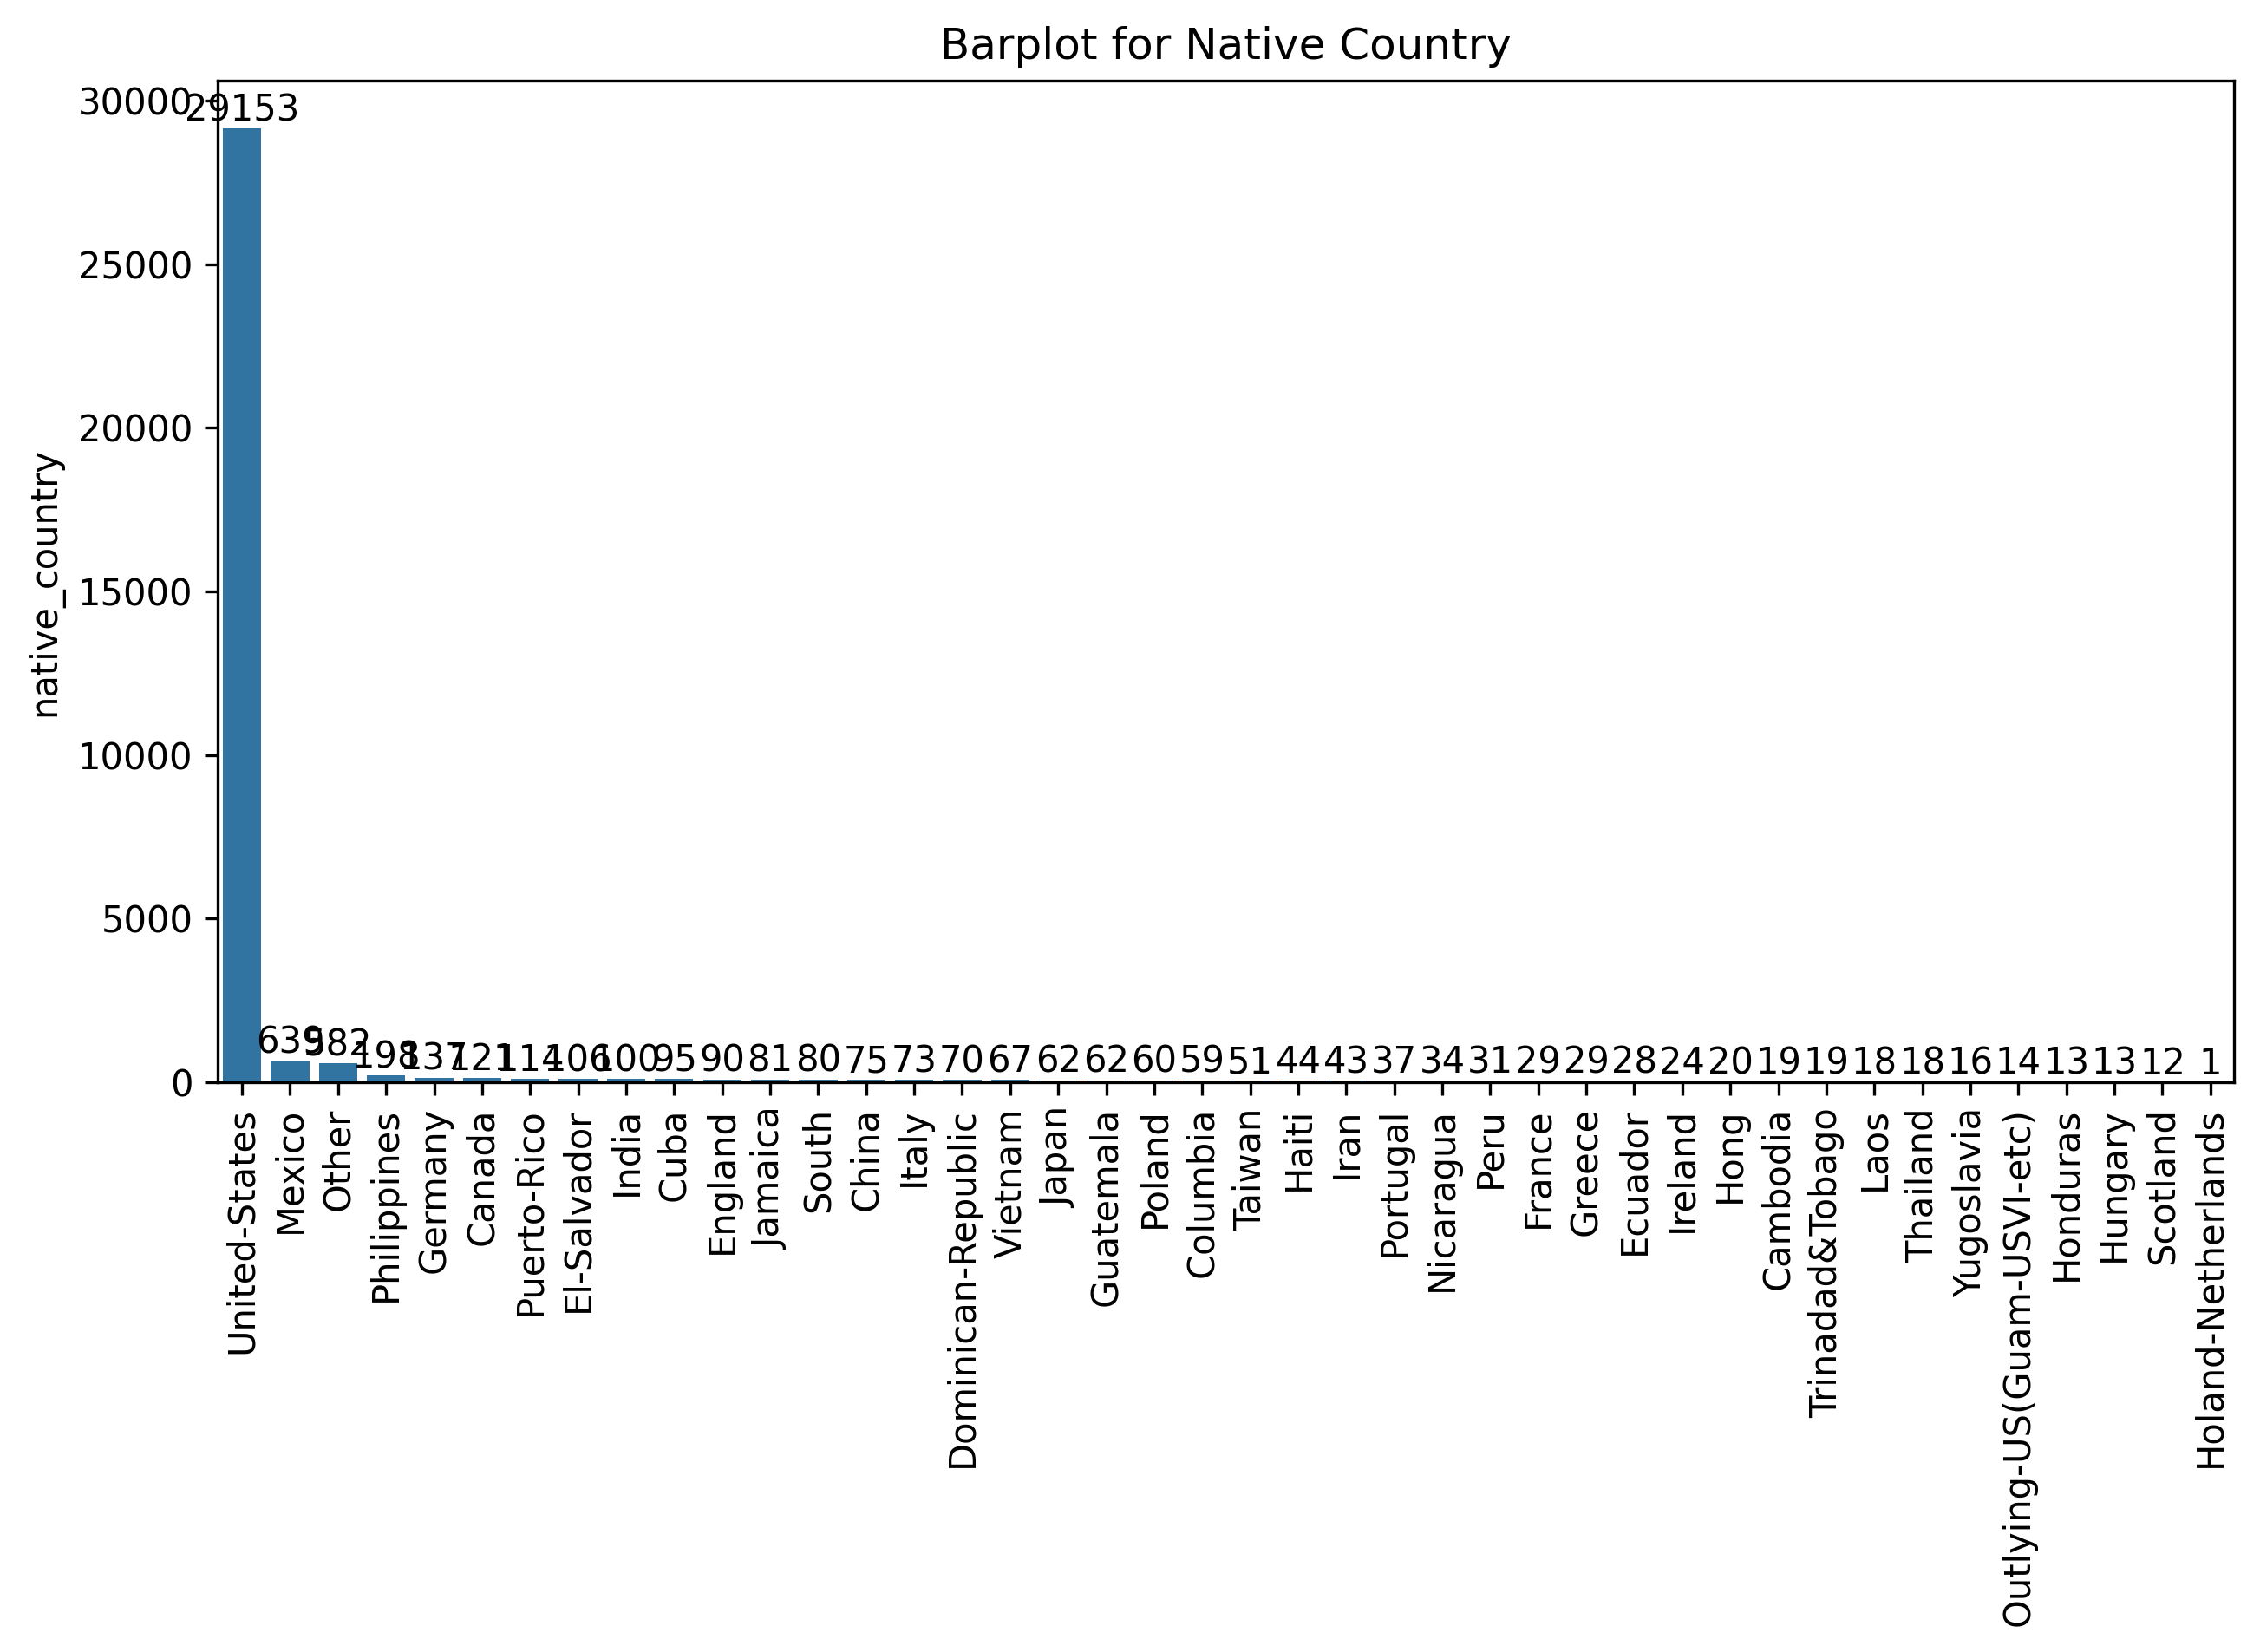

In [20]:
ax=sns.barplot(adult['native_country'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Native Country')
for i in ax.containers:
    ax.bar_label(i,)

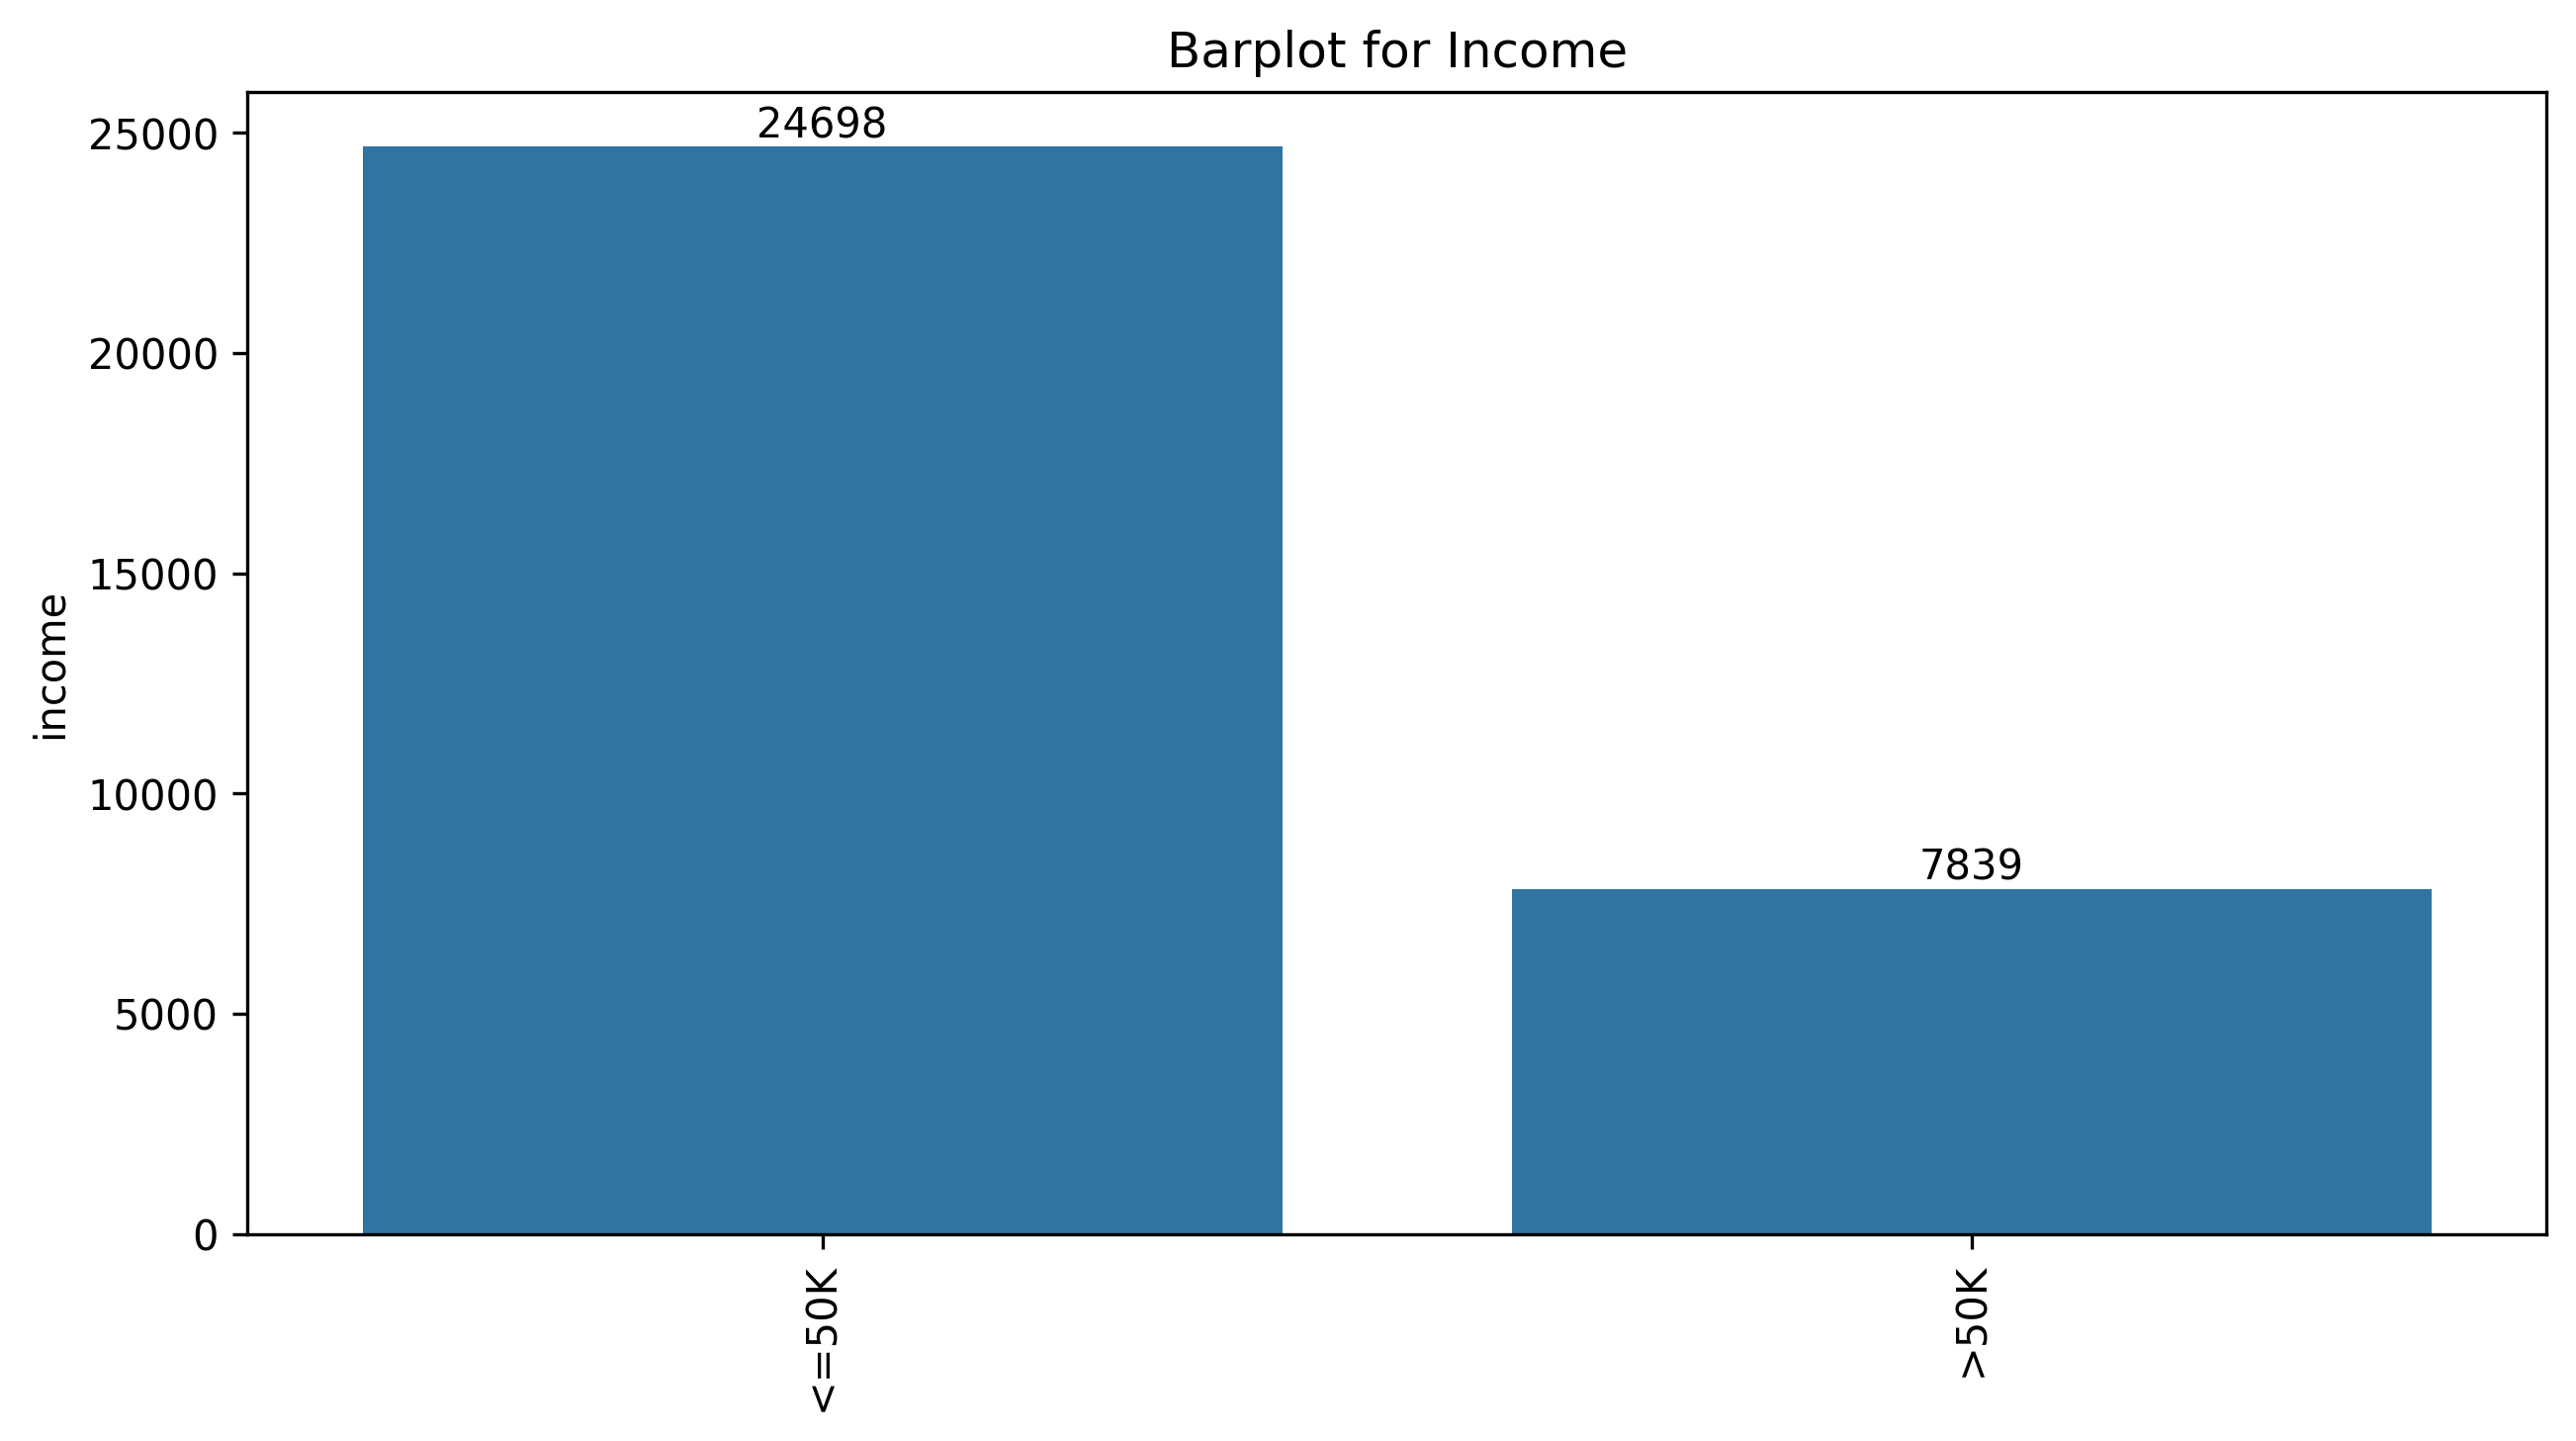

In [21]:
ax = sns.barplot(adult['income'].value_counts())
plt.xticks(rotation=90)
plt.title('Barplot for Income')
for i in ax.containers:
    ax.bar_label(i,)

<Axes: >

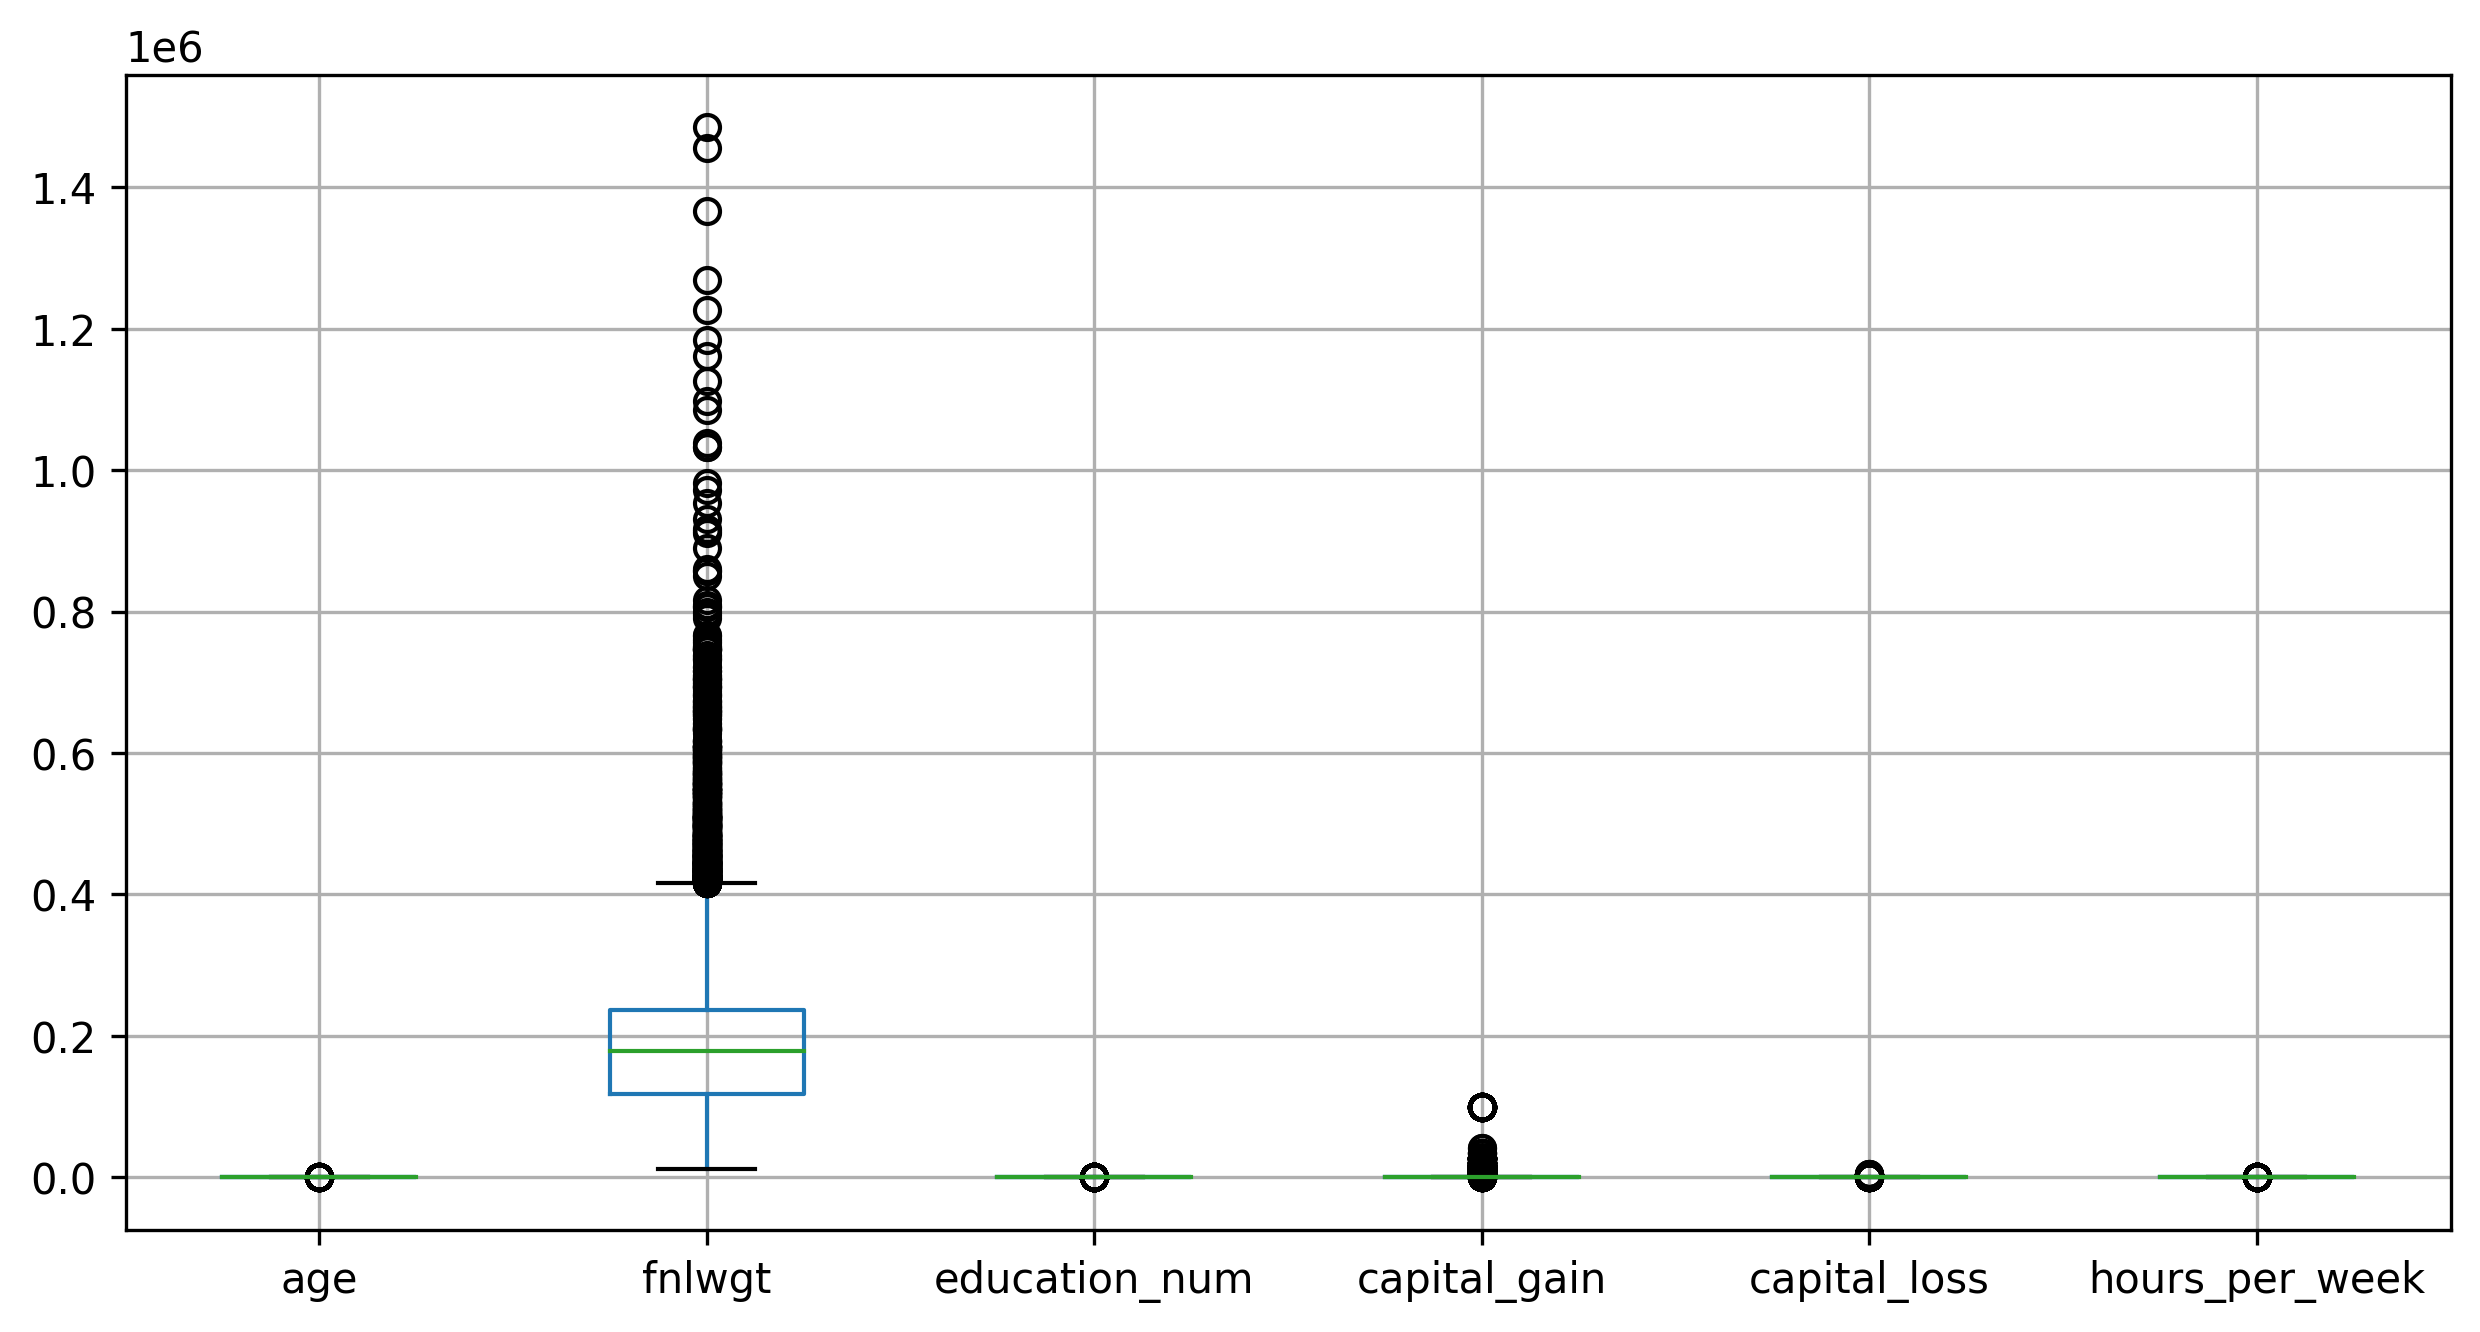

In [22]:
adult.boxplot()
# Every column has the outliers present
# fnlwgt has the maximum outliers present

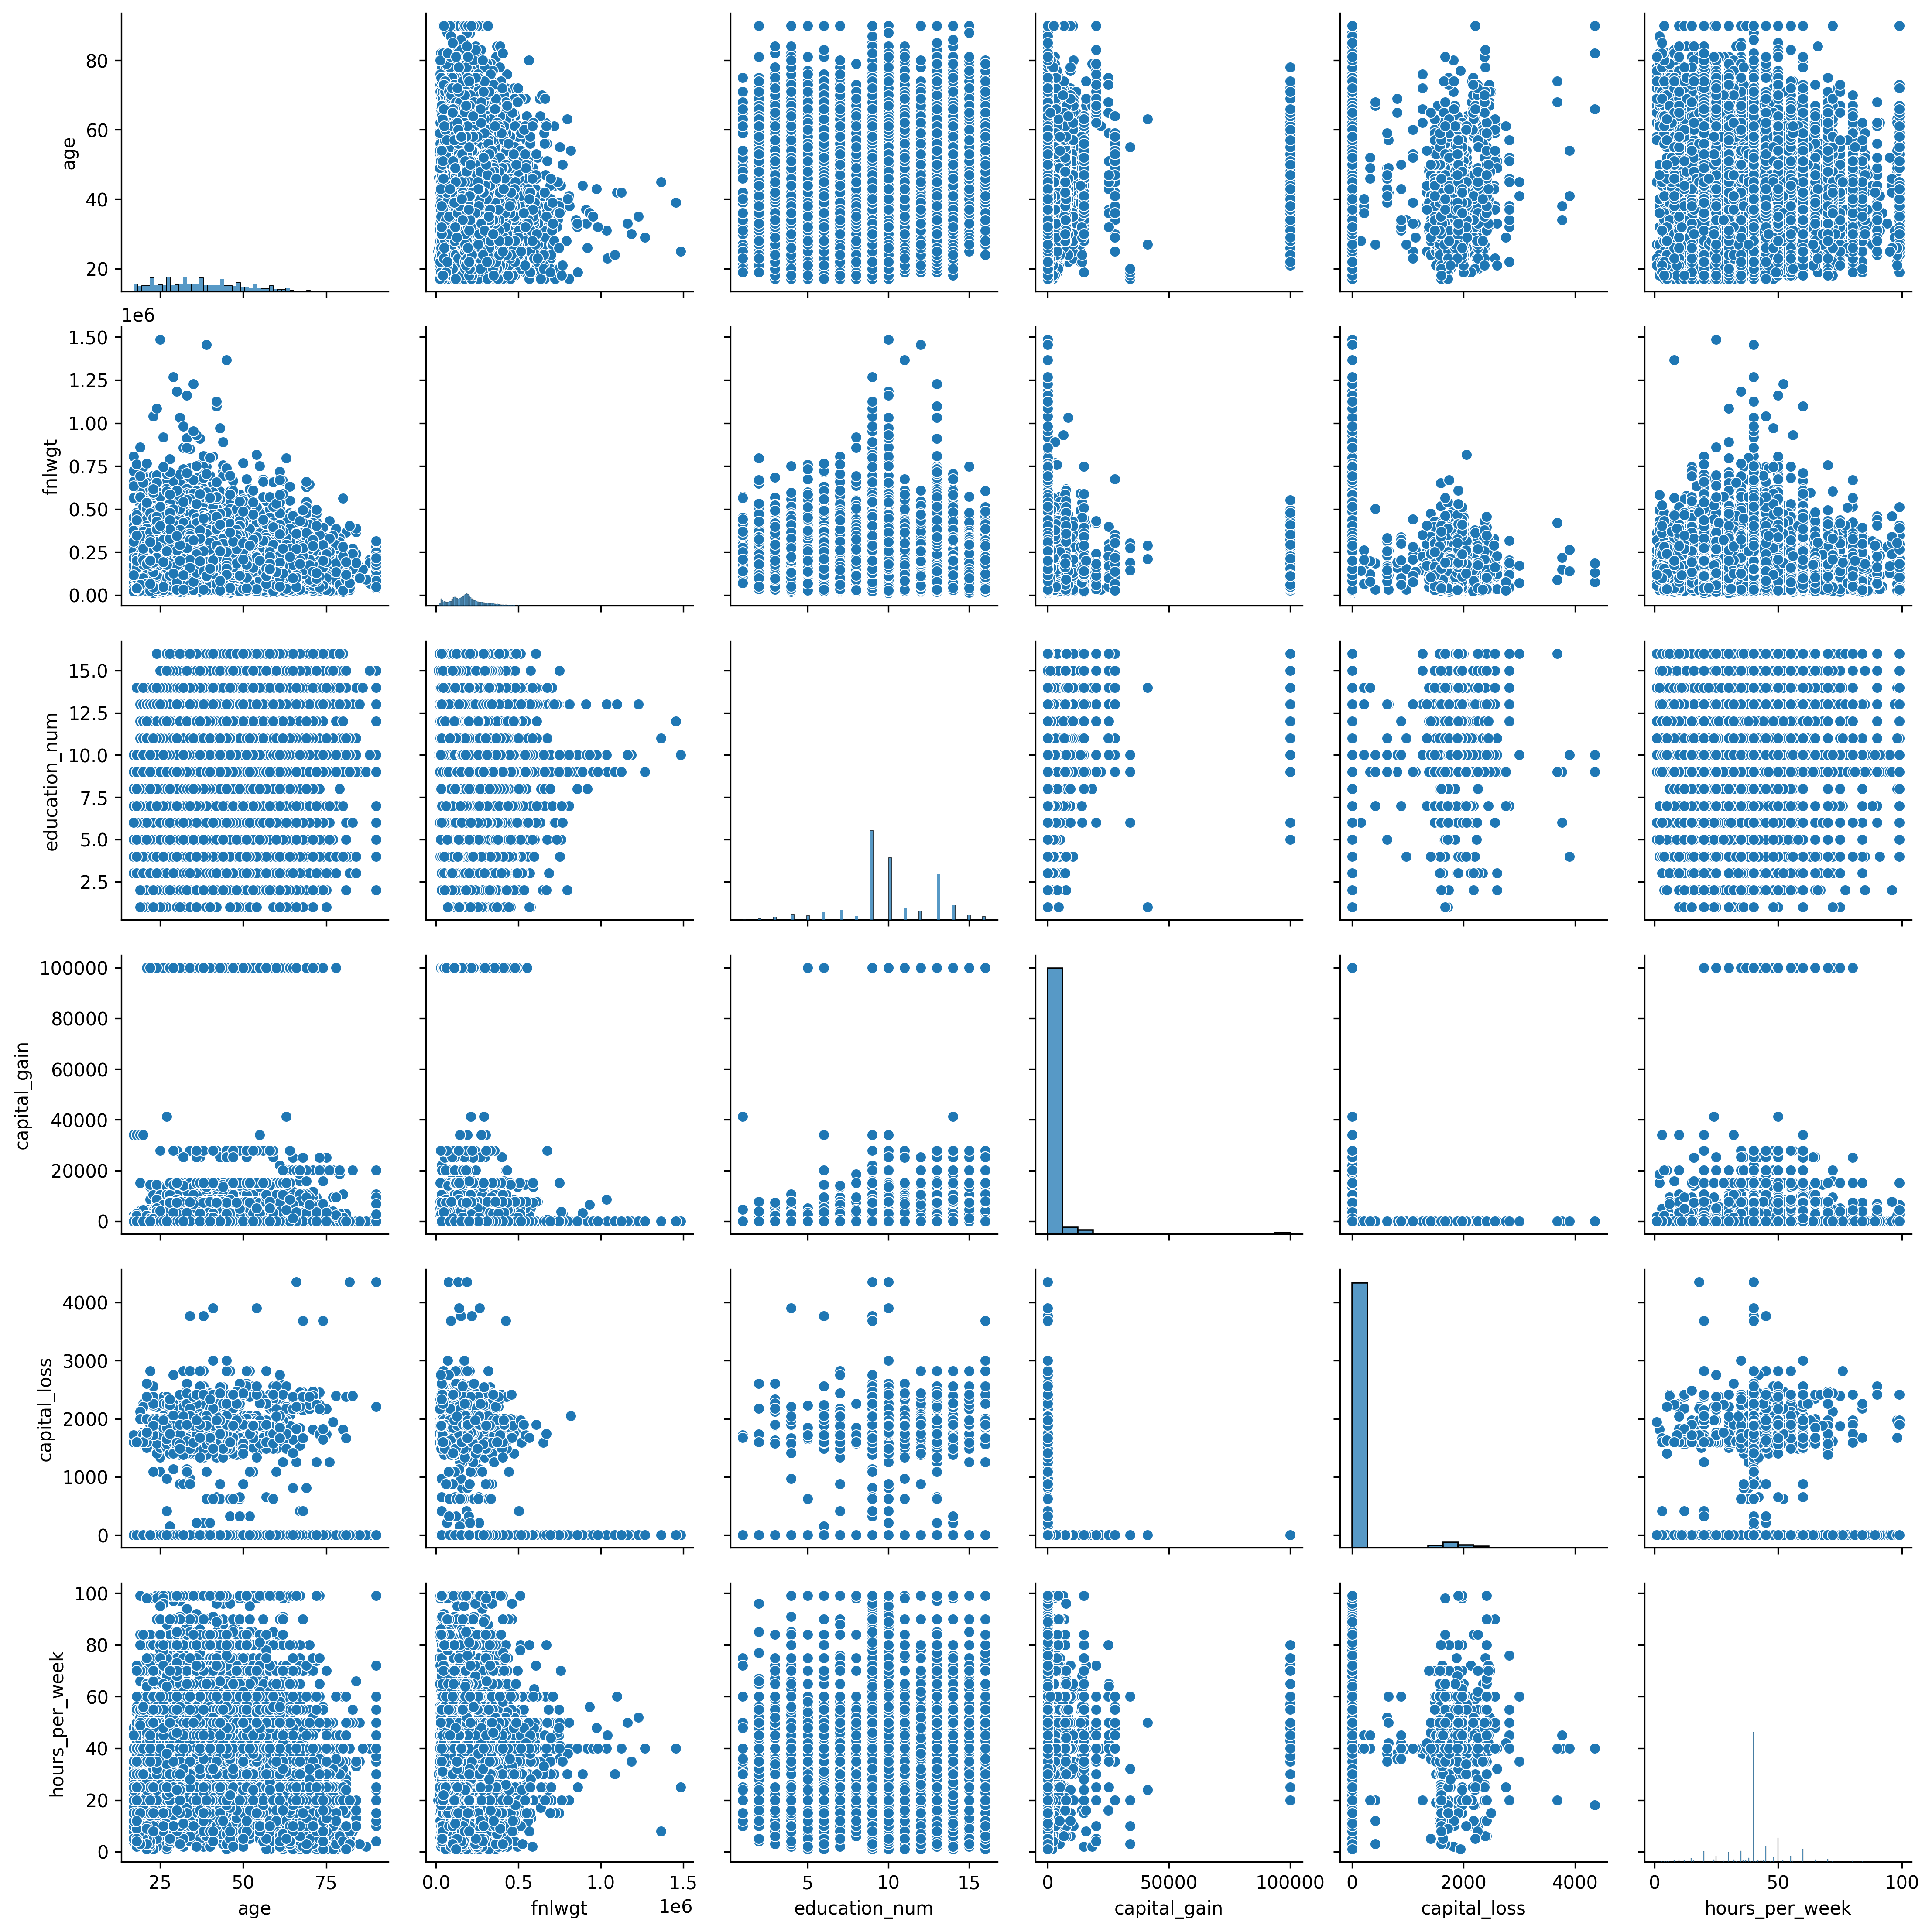

In [23]:
sns.pairplot(adult)

####Correlations between numerical columns

In [24]:
adult.corr(numeric_only = True)

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076447       0.036224      0.077676      0.057745   
fnlwgt         -0.076447  1.000000      -0.043388      0.000429     -0.010260   
education_num   0.036224 -0.043388       1.000000      0.122664      0.079892   
capital_gain    0.077676  0.000429       0.122664      1.000000     -0.031639   
capital_loss    0.057745 -0.010260       0.079892     -0.031639      1.000000   
hours_per_week  0.068515 -0.018898       0.148422      0.078408      0.054229   

                hours_per_week  
age                   0.068515  
fnlwgt               -0.018898  
education_num         0.148422  
capital_gain          0.078408  
capital_loss          0.054229  
hours_per_week        1.000000

<Axes: >

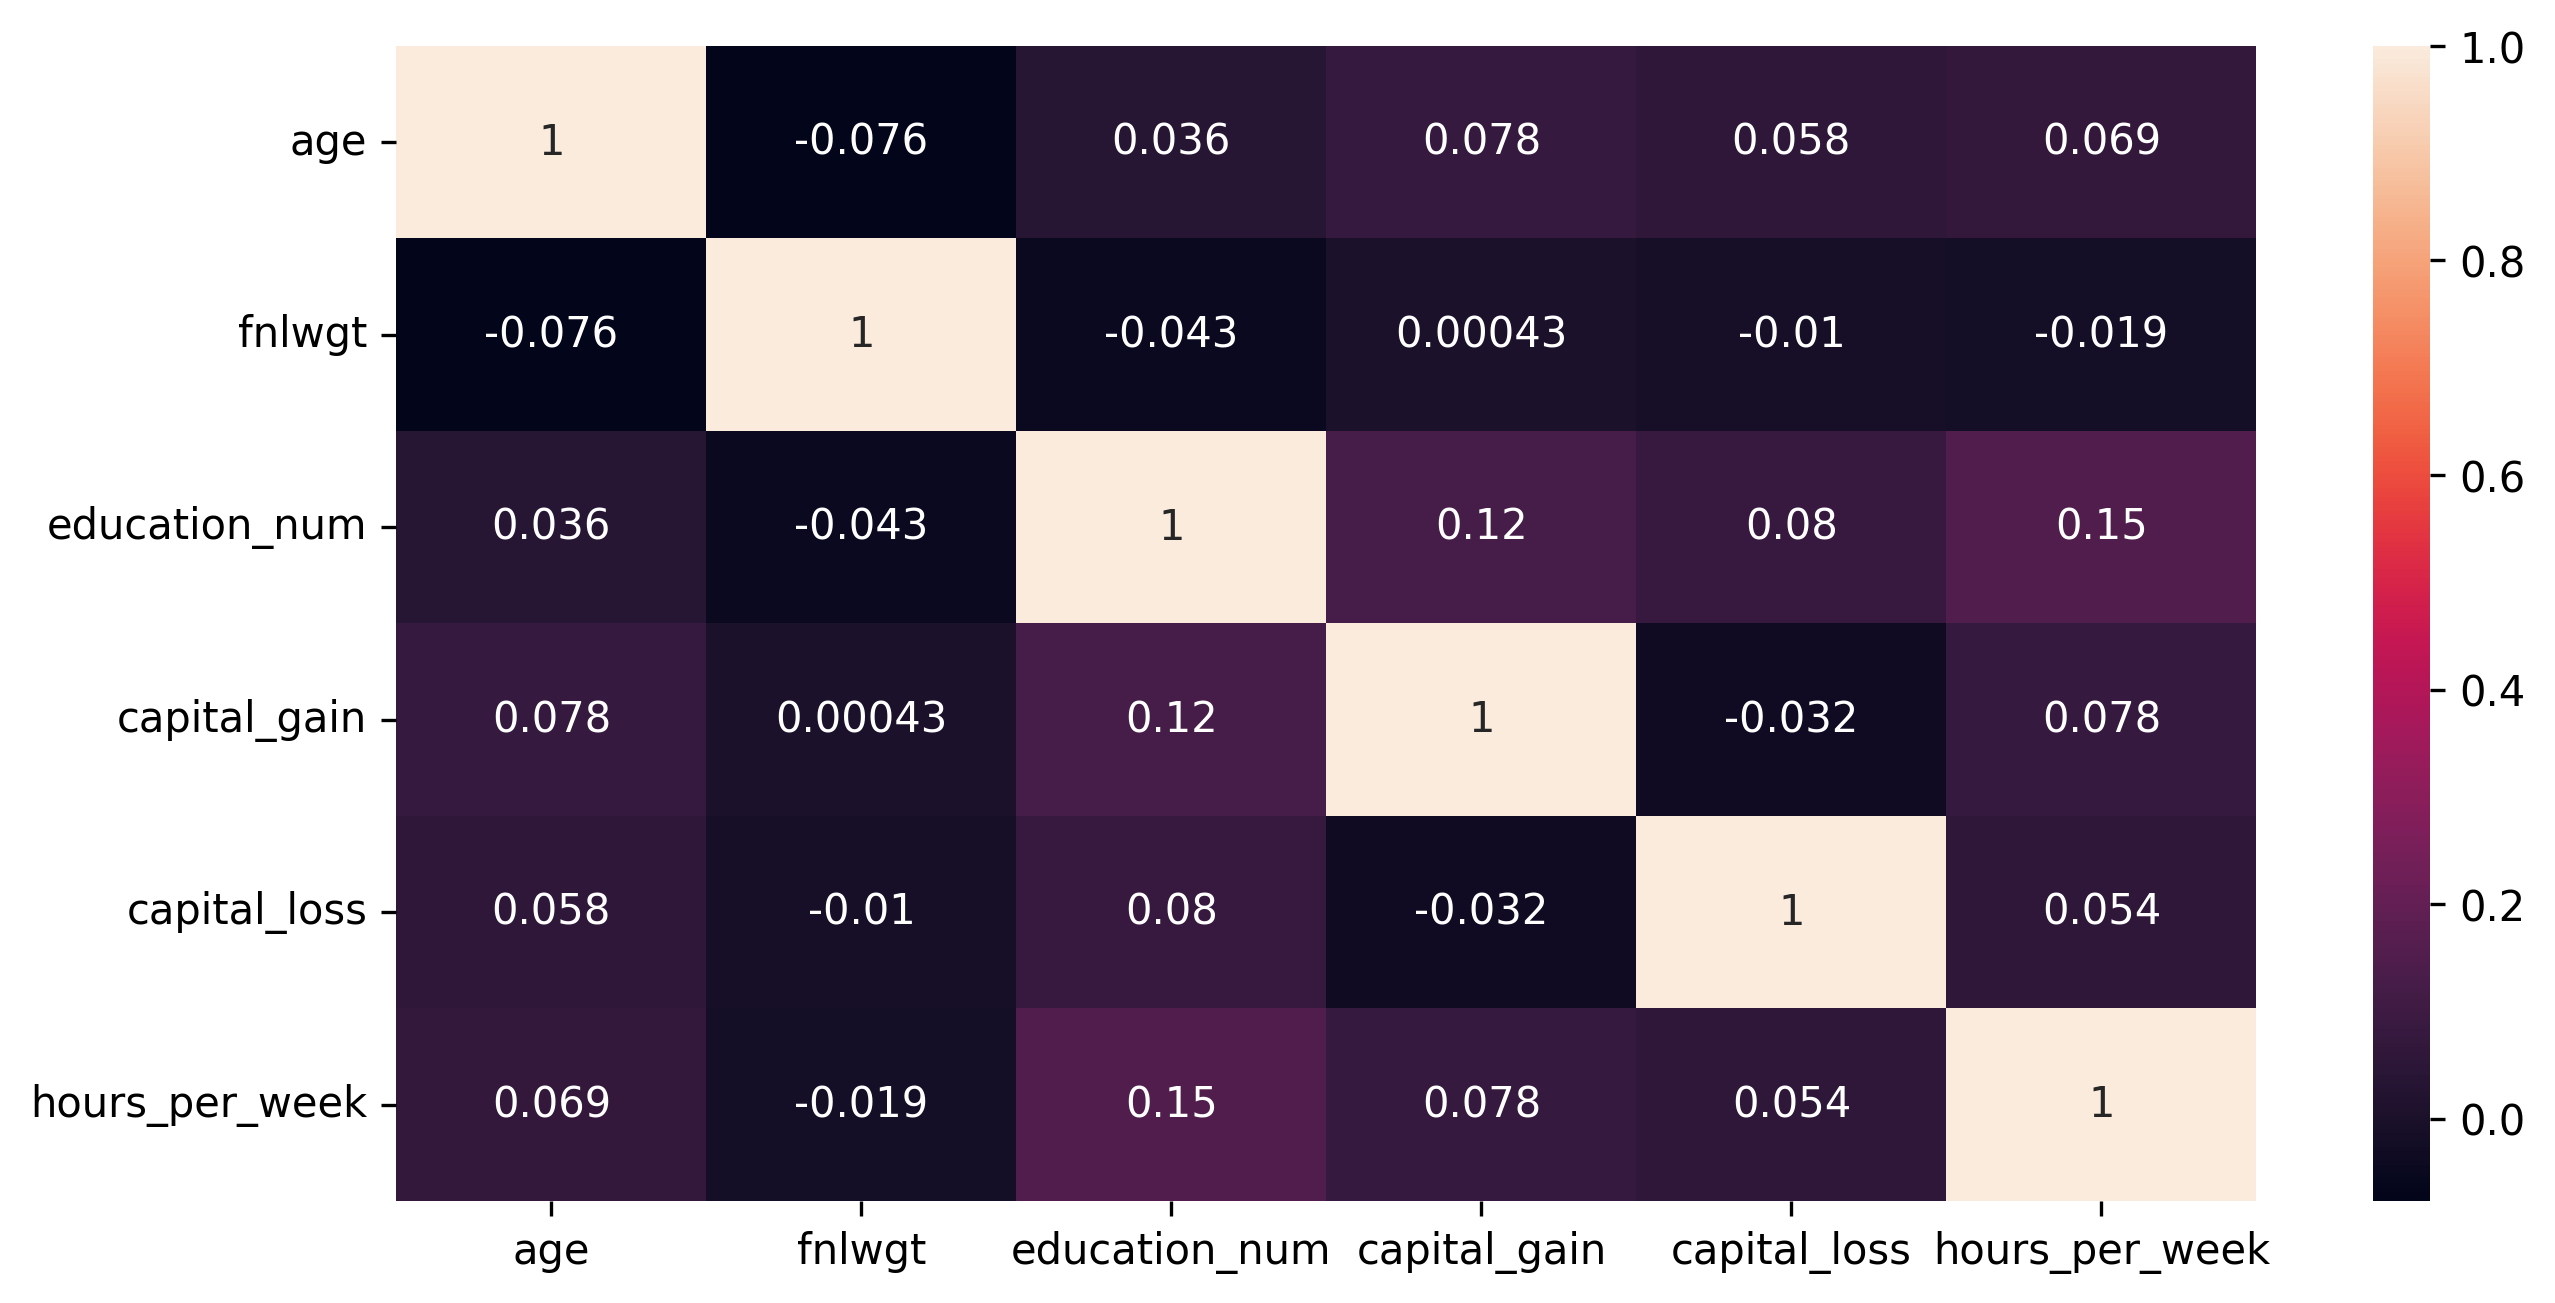

In [25]:
sns.heatmap(adult.corr(numeric_only = True), annot=True)
# This is a linear, symmetric correlation table

####Scaling features

In [26]:
numerical_df = adult.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]
numerical_df

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]

In [27]:
categorical_df = adult.loc[:,['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']]
categorical_df

workclass   education      marital_status         occupation  \
0             State-gov   Bachelors       Never-married       Adm-clerical   
1      Self-emp-not-inc   Bachelors  Married-civ-spouse    Exec-managerial   
2               Private     HS-grad            Divorced  Handlers-cleaners   
3               Private        11th  Married-civ-spouse  Handlers-cleaners   
4               Private   Bachelors  Married-civ-spouse     Prof-specialty   
...                 ...         ...                 ...                ...   
32556           Private  Assoc-acdm  Married-civ-spouse       Tech-support   
32557           Private     HS-grad  Married-civ-spouse  Machine-op-inspct   
32558           Private     HS-grad             Widowed       Adm-clerical   
32559           Private     HS-grad       Never-married       Adm-clerical   
32560      Self-emp-inc     HS-grad  Married-civ-spouse    Exec-managerial   

        relationship   race     sex native_country income  
0      Not-in-family  White    Male  United-States  <=50K  
1            Husband  White    Male  United-States  <=50K  
2      Not-in-family  White    Male  United-States  <=50K  
3            Husband  Black    Male  United-States  <=50K  
4               Wife  Black  Female           Cuba  <=50K  
...              ...    ...     ...            ...    ...  
32556           Wife  White  Female  United-States  <=50K  
32557        Husband  White    Male  United-States   >50K  
32558      Unmarried  White  Female  United-States  <=50K  
32559      Own-child  White    Male  United-States  <=50K  
32560           Wife  White  Female  United-States   >50K  

[32537 rows x 9 columns]

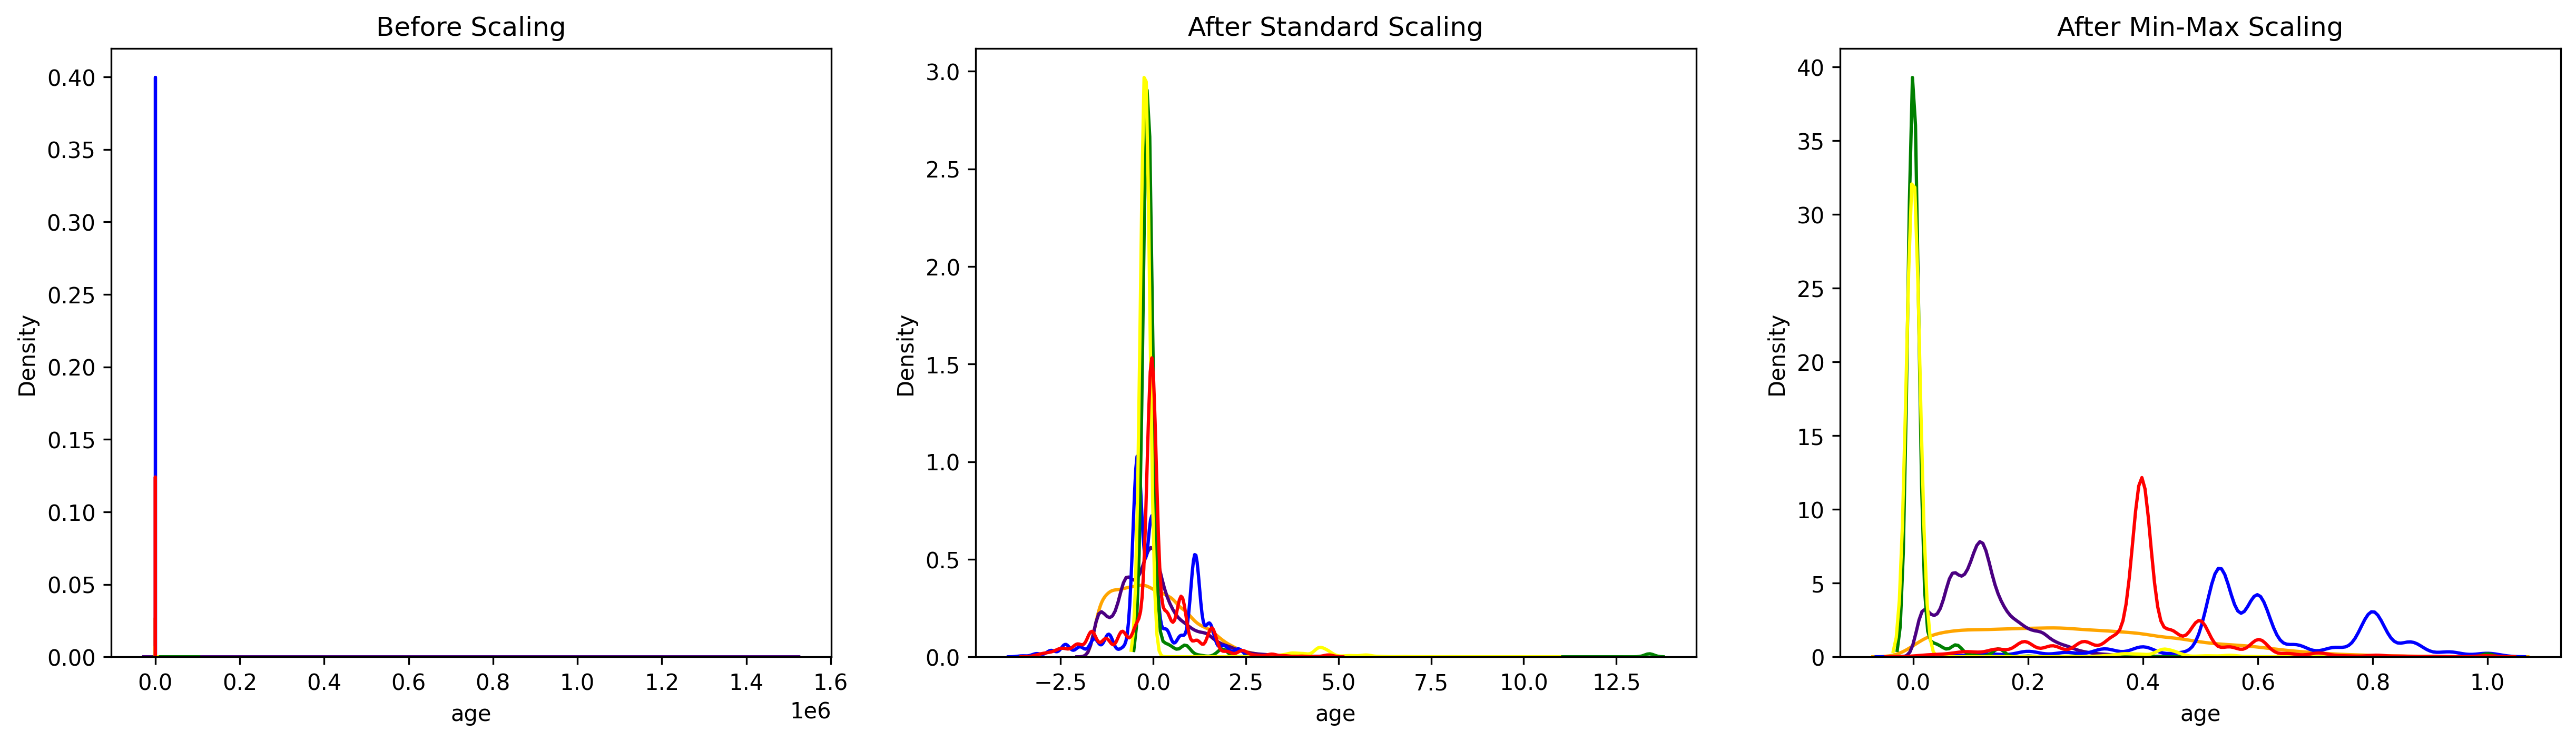

In [28]:
from sklearn import preprocessing

adult2 = adult.copy()
scaler = preprocessing.StandardScaler()
adult2.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']] = scaler.fit_transform(adult2.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']])
standard_df = adult2.copy()

adult2 = adult.copy()
scaler = preprocessing.MinMaxScaler()
adult2.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']] = scaler.fit_transform(adult2.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']])
minmax_df = adult2.copy()

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(adult['age'], ax = ax1, color ='orange')
sns.kdeplot(adult['fnlwgt'], ax = ax1, color ='indigo')
sns.kdeplot(adult['education_num'], ax = ax1, color ='blue')
sns.kdeplot(adult['capital_gain'], ax = ax1, color ='green')
sns.kdeplot(adult['capital_loss'], ax = ax1, color ='yellow')
sns.kdeplot(adult['hours_per_week'], ax = ax1, color ='red')

ax2.set_title('After Standard Scaling')
sns.kdeplot(standard_df['age'], ax = ax2, color ='orange')
sns.kdeplot(standard_df['fnlwgt'], ax = ax2, color ='indigo')
sns.kdeplot(standard_df['education_num'], ax = ax2, color ='blue')
sns.kdeplot(standard_df['capital_gain'], ax = ax2, color ='green')
sns.kdeplot(standard_df['capital_loss'], ax = ax2, color ='yellow')
sns.kdeplot(standard_df['hours_per_week'], ax = ax2, color ='red')

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['age'], ax = ax3, color ='orange')
sns.kdeplot(minmax_df['fnlwgt'], ax = ax3, color ='indigo')
sns.kdeplot(minmax_df['education_num'], ax = ax3, color ='blue')
sns.kdeplot(minmax_df['capital_gain'], ax = ax3, color ='green')
sns.kdeplot(minmax_df['capital_loss'], ax = ax3, color ='yellow')
sns.kdeplot(minmax_df['hours_per_week'], ax = ax3, color ='red')
plt.show()

In [29]:
standard_df
# Here all the values are normalize with mean=0 and variance as 1
# Lies within the range (-3,3)

age         workclass    fnlwgt   education  education_num  \
0      0.030390         State-gov -1.063569   Bachelors       1.134777   
1      0.836973  Self-emp-not-inc -1.008668   Bachelors       1.134777   
2     -0.042936           Private  0.245040     HS-grad      -0.420679   
3      1.056950           Private  0.425752        11th      -1.198407   
4     -0.776193           Private  1.408066   Bachelors       1.134777   
...         ...               ...       ...         ...            ...   
32556 -0.849519           Private  0.639678  Assoc-acdm       0.745913   
32557  0.103716           Private -0.335436     HS-grad      -0.420679   
32558  1.423579           Private -0.358779     HS-grad      -0.420679   
32559 -1.216148           Private  0.110930     HS-grad      -0.420679   
32560  0.983625      Self-emp-inc  0.929812     HS-grad      -0.420679   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country income  
0          0.148292     -0.216743       -0.035664  United-States  <=50K  
1         -0.145975     -0.216743       -2.222483  United-States  <=50K  
2         -0.145975     -0.216743       -0.035664  United-States  <=50K  
3         -0.145975     -0.216743       -0.035664  United-States  <=50K  
4         -0.145975     -0.216743       -0.035664           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556     -0.145975     -0.216743       -0.197650  United-States  <=50K  
32557     -0.145975     -0.216743       -0.035664  United-States   >50K  
32558     -0.145975     -0.216743       -0.035664  United-States  <=50K  
32559     -0.145975     -0.216743       -1.655530  United-States  <=50K  
32560      1.887635     -0.216743       -0.035664  United-States   >50K  

[32537 rows x 15 columns]

In [30]:
minmax_df
# Here all the values are scaled
# Lies within the range (0,1)

age         workclass    fnlwgt   education  education_num  \
0      0.301370         State-gov  0.044302   Bachelors       0.800000   
1      0.452055  Self-emp-not-inc  0.048238   Bachelors       0.800000   
2      0.287671           Private  0.138113     HS-grad       0.533333   
3      0.493151           Private  0.151068        11th       0.400000   
4      0.150685           Private  0.221488   Bachelors       0.800000   
...         ...               ...       ...         ...            ...   
32556  0.136986           Private  0.166404  Assoc-acdm       0.733333   
32557  0.315068           Private  0.096500     HS-grad       0.533333   
32558  0.561644           Private  0.094827     HS-grad       0.533333   
32559  0.068493           Private  0.128499     HS-grad       0.533333   
32560  0.479452      Self-emp-inc  0.187203     HS-grad       0.533333   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country income  
0          0.021740           0.0        0.397959  United-States  <=50K  
1          0.000000           0.0        0.122449  United-States  <=50K  
2          0.000000           0.0        0.397959  United-States  <=50K  
3          0.000000           0.0        0.397959  United-States  <=50K  
4          0.000000           0.0        0.397959           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556      0.000000           0.0        0.377551  United-States  <=50K  
32557      0.000000           0.0        0.397959  United-States   >50K  
32558      0.000000           0.0        0.397959  United-States  <=50K  
32559      0.000000           0.0        0.193878  United-States  <=50K  
32560      0.150242           0.0        0.397959  United-States   >50K  

[32537 rows x 15 columns]

####Answers
* When we use the Standard Scalar, the outliers have an influence when computing the mean and standard deviation which shrink the range of the feature values. Hence, StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers. StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers. For using Standard Scaler you should know about the distribution of your dataset.
* MinMaxScaler rescales the data set such that all feature values are in the range (0,1). MinMaxScaler does not reduce the effect of outliers, but it linearly scales them down into a fixed range. It is useful when data has varying scales and the algorithm does not make assumptions about the distribution.

#2. Encoding Techniques:
* Apply One-Hot Encoding to categorical variables with less than 5 categories.
* Use Label Encoding for categorical variables with more than 5 categories.
* Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [31]:
OHE_list = []
LE_list = []
for i in adult.columns:
    if adult[i].dtype == 'object':
        if len(adult[i].unique()) <= 5:
            OHE_list.append(i)
        else:
            LE_list.append(i)
print("One Hot Encoding applicable columns:",OHE_list)
print("Label Encoding applicable columns:",LE_list)
# Here, we see 'race','sex','income' has less than 5 categories
# Also, 'workclass','education','marital_status','occupation','relationship' and 'native_country' have more than 5 categories

One Hot Encoding applicable columns: ['race', 'sex', 'income']
Label Encoding applicable columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [32]:
# So, According to the criteria, lets perform one-hot encoding to 'race','sex' and 'income' columns
adult1 = adult.copy()
adult1 = pd.get_dummies(data = adult, columns = ['race','sex','income'], dtype = 'int64')
adult1

age         workclass  fnlwgt   education  education_num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation   relationship  capital_gain  \
0           Never-married       Adm-clerical  Not-in-family          2174   
1      Married-civ-spouse    Exec-managerial        Husband             0   
2                Divorced  Handlers-cleaners  Not-in-family             0   
3      Married-civ-spouse  Handlers-cleaners        Husband             0   
4      Married-civ-spouse     Prof-specialty           Wife             0   
...                   ...                ...            ...           ...   
32556  Married-civ-spouse       Tech-support           Wife             0   
32557  Married-civ-spouse  Machine-op-inspct        Husband             0   
32558             Widowed       Adm-clerical      Unmarried             0   
32559       Never-married       Adm-clerical      Own-child             0   
32560  Married-civ-spouse    Exec-managerial           Wife         15024   

       capital_loss  ...  native_country race_Amer-Indian-Eskimo  \
0                 0  ...   United-States                       0   
1                 0  ...   United-States                       0   
2                 0  ...   United-States                       0   
3                 0  ...   United-States                       0   
4                 0  ...            Cuba                       0   
...             ...  ...             ...                     ...   
32556             0  ...   United-States                       0   
32557             0  ...   United-States                       0   
32558             0  ...   United-States                       0   
32559             0  ...   United-States                       0   
32560             0  ...   United-States                       0   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  \
0                            0           0           0           1   
1                            0           0           0           1   
2                            0           0           0           1   
3                            0           1           0           0   
4                            0           1           0           0   
...                        ...         ...         ...         ...   
32556                        0           0           0           1   
32557                        0           0           0           1   
32558                        0           0           0           1   
32559                        0           0           0           1   
32560                        0           0           0           1   

       sex_Female  sex_Male  income_<=50K  income_>50K  
0               0         1             1            0  
1               0         1             1            0  
2               0         1             1            0  
3               0         1             1            0  
4               1         0             1            0  
...           ...       ...           ...          ...  
32556           1         0             1            0  
32557           0         1             0            1  
32558           1         0             1            0  
32559           0         1             1        

In [33]:
# Columns on which the label Encoding has to be performed
adult1.iloc[:,[1,3,5,6,7,11]]

workclass   education      marital_status         occupation  \
0             State-gov   Bachelors       Never-married       Adm-clerical   
1      Self-emp-not-inc   Bachelors  Married-civ-spouse    Exec-managerial   
2               Private     HS-grad            Divorced  Handlers-cleaners   
3               Private        11th  Married-civ-spouse  Handlers-cleaners   
4               Private   Bachelors  Married-civ-spouse     Prof-specialty   
...                 ...         ...                 ...                ...   
32556           Private  Assoc-acdm  Married-civ-spouse       Tech-support   
32557           Private     HS-grad  Married-civ-spouse  Machine-op-inspct   
32558           Private     HS-grad             Widowed       Adm-clerical   
32559           Private     HS-grad       Never-married       Adm-clerical   
32560      Self-emp-inc     HS-grad  Married-civ-spouse    Exec-managerial   

        relationship native_country  
0      Not-in-family  United-States  
1            Husband  United-States  
2      Not-in-family  United-States  
3            Husband  United-States  
4               Wife           Cuba  
...              ...            ...  
32556           Wife  United-States  
32557        Husband  United-States  
32558      Unmarried  United-States  
32559      Own-child  United-States  
32560           Wife  United-States  

[32537 rows x 6 columns]

In [34]:
# Also, 'workclass','education','marital_status','occupation','relationship' and 'native_country' have more than 5 categories
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
adult1.loc[:,['workclass']] = labelencoder.fit_transform(adult1.loc[:,['workclass']])
adult1.loc[:,['education']] = labelencoder.fit_transform(adult1.loc[:,['education']])
adult1.loc[:,['marital_status']] = labelencoder.fit_transform(adult1.loc[:,['marital_status']])
adult1.loc[:,['occupation']] = labelencoder.fit_transform(adult1.loc[:,['occupation']])
adult1.loc[:,['relationship']] = labelencoder.fit_transform(adult1.loc[:,['relationship']])
adult1.loc[:,['native_country']] = labelencoder.fit_transform(adult1.loc[:,['native_country']])
adult1.iloc[:,[1,3,5,6,7,11]]

workclass  education  marital_status  occupation  relationship  \
0              7          9               4           0             1   
1              6          9               2           3             0   
2              4         11               0           5             1   
3              4          1               2           5             0   
4              4          9               2          10             5   
...          ...        ...             ...         ...           ...   
32556          4          7               2          13             5   
32557          4         11               2           6             0   
32558          4         11               6           0             4   
32559          4         11               4           0             3   
32560          5         11               2           3             5   

       native_country  
0                  39  
1                  39  
2                  39  
3                  39  
4                   4  
...               ...  
32556              39  
32557              39  
32558              39  
32559              39  
32560              39  

[32537 rows x 6 columns]

In [35]:
# After Performing encoding techniques to the whole data.
adult1.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  capital_gain  capital_loss  ...  native_country  \
0           0             1          2174             0  ...              39   
1           3             0             0             0  ...              39   
2           5             1             0             0  ...              39   
3           5             0             0             0  ...              39   
4          10             5             0             0  ...               4   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                        0                        0           0           0   
1                        0                        0           0           0   
2                        0                        0           0           0   
3                        0                        0           1           0   
4                        0                        0           1           0   

   race_White  sex_Female  sex_Male  income_<=50K  income_>50K  
0           1           0         1             1            0  
1           1           0         1             1            0  
2           1           0         1             1            0  
3           0           0         1             1            0  
4           0           1         0             1            0  

[5 rows x 21 columns]

* We usually use Label Encoding, when the target variable is in the categorical data. On the other hand we use One-hot Encoding when the independent variables are of categorical type.
* In One-Hot encoding, the advantage is that it converts the data into a binary form making easier to understand but the disadvantage is that it creates more column in the dataframe making the complex structure.
* In Label Encoding, the advantage is that it will create only one column and assigns the integer label to each unique category in the column data. But disadvantage of this is that it is not suitable for high cardinality.

#3. Feature Engineering:
* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [36]:
# Lets create a new feature which contains information about whether the person lives alone or not
# It is obvious that if the person is living alone their expenses on the family members living with them is none
# This would be a good feature for the model building
adult_f = adult.copy()
adult_f['is_alone'] = (adult_f['relationship'] == 'Not-in-family').astype(int)
adult_f['is_alone'].value_counts()

0    24245
1     8292
Name: is_alone, dtype: int64

In [37]:
# Lets also create the new feature which is 'Capital difference'
adult_f['capital_diff'] = abs((adult_f['capital_gain'] - adult_f['capital_loss']))
adult_f.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  is_alone  \
0          2174             0              40  United-States  <=50K         1   
1             0             0              13  United-States  <=50K         0   
2             0             0              40  United-States  <=50K         1   
3             0             0              40  United-States  <=50K         0   
4             0             0              40           Cuba  <=50K         0   

   capital_diff  
0          2174  
1             0  
2             0  
3             0  
4             0

Hence, we added two features named 'is_alone' and 'capital_diff'. Which are quite useful for model building

In [38]:
adult_f.skew(axis=0,numeric_only=True)
# We can see the skewness of the columns

age                0.557663
fnlwgt             1.447703
education_num     -0.309500
capital_gain      11.949403
capital_loss       4.592702
hours_per_week     0.228759
is_alone           1.125179
capital_diff      11.922687
dtype: float64

In [39]:
# Lets apply Logarithmic transformation to 'capital_gain' and 'capital_diff' as it has more skewness than any other columns
adult_f['capital_gain'] = np.log1p(adult_f['capital_gain'])
adult_f['capital_diff'] = np.log1p(adult_f['capital_diff'])
adult_f.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  is_alone  \
0      7.684784             0              40  United-States  <=50K         1   
1      0.000000             0              13  United-States  <=50K         0   
2      0.000000             0              40  United-States  <=50K         1   
3      0.000000             0              40  United-States  <=50K         0   
4      0.000000             0              40           Cuba  <=50K         0   

   capital_diff  
0      7.684784  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000

In [40]:
adult_f.skew(axis=0,numeric_only=True)
# Skewness has been reduced

age               0.557663
fnlwgt            1.447703
education_num    -0.309500
capital_gain      3.094667
capital_loss      4.592702
hours_per_week    0.228759
is_alone          1.125179
capital_diff      2.283269
dtype: float64

In [41]:
# Lets do the Encoding and Scaling again with the new data

# Minmax Scaled numerical data as it keeps the outliers
adult_new = adult_f.copy()
scaler = preprocessing.MinMaxScaler()
adult_new.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','capital_diff']] = scaler.fit_transform(adult_new.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','capital_diff']])

# Label Encoded for categorical data with more than 5 categories
labelencoder = LabelEncoder()
adult_new.loc[:,['workclass']] = labelencoder.fit_transform(adult_new.loc[:,['workclass']])
adult_new.loc[:,['education']] = labelencoder.fit_transform(adult_new.loc[:,['education']])
adult_new.loc[:,['marital_status']] = labelencoder.fit_transform(adult_new.loc[:,['marital_status']])
adult_new.loc[:,['occupation']] = labelencoder.fit_transform(adult_new.loc[:,['occupation']])
adult_new.loc[:,['relationship']] = labelencoder.fit_transform(adult_new.loc[:,['relationship']])
adult_new.loc[:,['native_country']] = labelencoder.fit_transform(adult_new.loc[:,['native_country']])

# One Hot Encoded for categorical data with less than or equal to 5 categories
adult_new = pd.get_dummies(data = adult_new, columns = ['race','sex','is_alone','income'], dtype = 'int64')

# Removing some columns to get a better view
# As these columns are negatively correlated with 'sex_male', 'is_alone_1' and 'income_<=50k' respectively
adult_new.drop(columns=['sex_Female','is_alone_0','income_>50K'], inplace=True)

adult_new

age  workclass    fnlwgt  education  education_num  \
0      0.301370          7  0.044302          9       0.800000   
1      0.452055          6  0.048238          9       0.800000   
2      0.287671          4  0.138113         11       0.533333   
3      0.493151          4  0.151068          1       0.400000   
4      0.150685          4  0.221488          9       0.800000   
...         ...        ...       ...        ...            ...   
32556  0.136986          4  0.166404          7       0.733333   
32557  0.315068          4  0.096500         11       0.533333   
32558  0.561644          4  0.094827         11       0.533333   
32559  0.068493          4  0.128499         11       0.533333   
32560  0.479452          5  0.187203         11       0.533333   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           0             1      0.667492           0.0   
1                   2           3             0      0.000000           0.0   
2                   0           5             1      0.000000           0.0   
3                   2           5             0      0.000000           0.0   
4                   2          10             5      0.000000           0.0   
...               ...         ...           ...           ...           ...   
32556               2          13             5      0.000000           0.0   
32557               2           6             0      0.000000           0.0   
32558               6           0             4      0.000000           0.0   
32559               4           0             3      0.000000           0.0   
32560               2           3             5      0.835363           0.0   

       ...  native_country  capital_diff  race_Amer-Indian-Eskimo  \
0      ...              39      0.667492                        0   
1      ...              39      0.000000                        0   
2      ...              39      0.000000                        0   
3      ...              39      0.000000                        0   
4      ...               4      0.000000                        0   
...    ...             ...           ...                      ...   
32556  ...              39      0.000000                        0   
32557  ...              39      0.000000                        0   
32558  ...              39      0.000000                        0   
32559  ...              39      0.000000                        0   
32560  ...              39      0.835363                        0   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Male  \
0                            0           0           0           1         1   
1                            0           0           0           1         1   
2                            0           0           0           1         1   
3                            0           1           0           0         1   
4                            0           1           0           0         0   
...                        ...         ...         ...         ...       ...   
32556                        0           0           0           1         0   
32557                        0           0           0           1         1   
32558                        0           0           0           1         0   
32559                        0           0           0           1         1   
32560                        0           0           0           1         0   

       is_alone_1  income_<=50K  
0               1             1  
1               0             1  
2               1             1  
3               0             1  
4               0             1  
...           ...           ...  
32556           0             1  
32557           0             0  
32558           0             1  
32559           0             1  
32560           0             0  

[32537 rows x 21 columns]

#4. Feature Selection:
* Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
* Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = adult_new.iloc[:,0:20]
Y = adult_new.iloc[:,-1]

In [43]:
X.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.301370          7  0.044302          9       0.800000               4   
1  0.452055          6  0.048238          9       0.800000               2   
2  0.287671          4  0.138113         11       0.533333               0   
3  0.493151          4  0.151068          1       0.400000               2   
4  0.150685          4  0.221488          9       0.800000               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           0             1      0.667492           0.0        0.397959   
1           3             0      0.000000           0.0        0.122449   
2           5             1      0.000000           0.0        0.397959   
3           5             0      0.000000           0.0        0.397959   
4          10             5      0.000000           0.0        0.397959   

   native_country  capital_diff  race_Amer-Indian-Eskimo  \
0              39      0.667492                        0   
1              39      0.000000                        0   
2              39      0.000000                        0   
3              39      0.000000                        0   
4               4      0.000000                        0   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Male  \
0                        0           0           0           1         1   
1                        0           0           0           1         1   
2                        0           0           0           1         1   
3                        0           1           0           0         1   
4                        0           1           0           0         0   

   is_alone_1  
0           1  
1           0  
2           1  
3           0  
4           0

In [44]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: income_<=50K, dtype: int64

* Univariate Selection

In [45]:
# Feature Extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X,Y)

# Summarizing the scores
from numpy import set_printoptions
set_printoptions(precision=4)
print(fit.scores_)

[2.1035e+02 7.5911e-02 1.2525e-01 2.9810e+02 1.7755e+02 1.1217e+03
 1.9485e+02 3.6582e+03 1.9420e+03 3.1465e+02 6.7682e+01 1.7739e+01
 2.2729e+03 2.6644e+01 3.5390e+00 2.3356e+02 3.2755e+01 3.4450e+01
 5.0197e+02 8.5965e+02]


In [46]:
adult_new.columns[0:20]

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'capital_diff',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Male', 'is_alone_1'],
      dtype='object')

In [47]:
# Storing chi square values in a dataframe
x = pd.DataFrame(fit.scores_).T
x.columns = adult_new.columns[0:20]
sorted_x =  x.sort_values(by=0, ascending=False, axis=1)
sorted_x
# These are the important features according to the data in a descending order

relationship  capital_diff  capital_gain  marital_status  is_alone_1  \
0    3658.21506   2272.853612   1941.967579     1121.721831    859.6465   

     sex_Male  capital_loss   education  race_Black         age  occupation  \
0  501.968535    314.651444  298.098144  233.555472  210.352619  194.849887   

   education_num  hours_per_week  race_White  race_Other  \
0     177.546273       67.682469   34.450379    32.75492   

   race_Amer-Indian-Eskimo  native_country  race_Asian-Pac-Islander    fnlwgt  \
0                26.643671       17.738824                 3.538957  0.125249   

   workclass  
0   0.075911

* Recursive Feature Elimination

In [48]:
# Lets do the feature selection by RFE method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X,Y)
fit.n_features_
# 10 most important features are there

10

In [49]:
imp_f = {X.columns[i]:fit.ranking_[i] for i in range(len(X.columns))}
imp_f

{'age': 1,
 'workclass': 7,
 'fnlwgt': 1,
 'education': 9,
 'education_num': 1,
 'marital_status': 5,
 'occupation': 11,
 'relationship': 2,
 'capital_gain': 1,
 'capital_loss': 1,
 'hours_per_week': 1,
 'native_country': 10,
 'capital_diff': 4,
 'race_Amer-Indian-Eskimo': 6,
 'race_Asian-Pac-Islander': 3,
 'race_Black': 8,
 'race_Other': 1,
 'race_White': 1,
 'sex_Male': 1,
 'is_alone_1': 1}

* Outlier Detection -  Using Isolation Forest

In [50]:
# Lets use the Isolation Forest algorithm to identify and remove outliers
from sklearn.ensemble import IsolationForest
iso = IsolationForest(random_state=10, contamination=0.01)
iso.fit(adult_new)

IsolationForest(contamination=0.01, random_state=10)

In [51]:
y_pred_outliers = iso.predict(adult_new)
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
np.unique(y_pred_outliers, return_counts=True)
# 326 outliers present

(array([-1,  1]), array([  326, 32211]))

In [53]:
adult_new['outlier'] = y_pred_outliers
adult_new

age  workclass    fnlwgt  education  education_num  \
0      0.301370          7  0.044302          9       0.800000   
1      0.452055          6  0.048238          9       0.800000   
2      0.287671          4  0.138113         11       0.533333   
3      0.493151          4  0.151068          1       0.400000   
4      0.150685          4  0.221488          9       0.800000   
...         ...        ...       ...        ...            ...   
32556  0.136986          4  0.166404          7       0.733333   
32557  0.315068          4  0.096500         11       0.533333   
32558  0.561644          4  0.094827         11       0.533333   
32559  0.068493          4  0.128499         11       0.533333   
32560  0.479452          5  0.187203         11       0.533333   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           0             1      0.667492           0.0   
1                   2           3             0      0.000000           0.0   
2                   0           5             1      0.000000           0.0   
3                   2           5             0      0.000000           0.0   
4                   2          10             5      0.000000           0.0   
...               ...         ...           ...           ...           ...   
32556               2          13             5      0.000000           0.0   
32557               2           6             0      0.000000           0.0   
32558               6           0             4      0.000000           0.0   
32559               4           0             3      0.000000           0.0   
32560               2           3             5      0.835363           0.0   

       ...  capital_diff  race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  \
0      ...      0.667492                        0                        0   
1      ...      0.000000                        0                        0   
2      ...      0.000000                        0                        0   
3      ...      0.000000                        0                        0   
4      ...      0.000000                        0                        0   
...    ...           ...                      ...                      ...   
32556  ...      0.000000                        0                        0   
32557  ...      0.000000                        0                        0   
32558  ...      0.000000                        0                        0   
32559  ...      0.000000                        0                        0   
32560  ...      0.835363                        0                        0   

       race_Black  race_Other  race_White  sex_Male  is_alone_1  income_<=50K  \
0               0           0           1         1           1             1   
1               0           0           1         1           0             1   
2               0           0           1         1           1             1   
3               1           0           0         1           0             1   
4               1           0           0         0           0             1   
...           ...         ...         ...       ...         ...           ...   
32556           0           0           1         0           0             1   
32557           0           0           1         1           0             0   
32558           0           0           1         0           0             1   
32559           0           0           1         1           0             1   
32560           0           0           1         0           0             0   

       outlier  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
32556        1  
32557        1  
32558        1  
32559        1  
32560        1  

[32537 rows x 22 columns]

In [54]:
# Removing outliers
f_no_outliers = adult_new[adult_new['outlier'] != -1].drop(columns=['outlier'])
f_no_outliers.shape

(32211, 21)

# Answer
* Effect of outliers on model:

Outliers are the incosistent data. Outliers can skew the results of regression models leading to poor predictions. Along with that, Outliers can cause misclassification. We always check if the data is normal before building the model, if the data have outliers then this basic assumption fails. Due to these outliers model performance also gets false impression.

* PPS (Predictive Power Score)

In [55]:
!pip install ppscore

In [56]:
import ppscore as pps

# PPS matrix
pps_matrix = pps.matrix(minmax_df).pivot(columns='x', index='y', values='ppscore')
pps_matrix

x                    age  capital_gain  capital_loss     education  \
y                                                                    
age             1.000000      0.011015      0.000000  2.348900e-02   
capital_gain    0.000000      1.000000      0.000000  0.000000e+00   
capital_loss    0.000000      0.000000      1.000000  0.000000e+00   
education       0.061247      0.000864      0.000000  1.000000e+00   
education_num   0.000000      0.006441      0.000000  1.000000e+00   
fnlwgt          0.000000      0.000000      0.000000  0.000000e+00   
hours_per_week  0.000000      0.000000      0.000000  0.000000e+00   
income          0.016853      0.319413      0.137888  2.471221e-01   
marital_status  0.318887      0.000000      0.000000  1.058008e-01   
native_country  0.000000      0.000000      0.000000  5.726869e-02   
occupation      0.046338      0.000000      0.000000  6.305831e-02   
race            0.000000      0.000000      0.000000  0.000000e+00   
relationship    0.224396      0.009204      0.000000  2.754563e-03   
sex             0.018859      0.000000      0.000000  0.000000e+00   
workclass       0.021022      0.003936      0.000000  1.159596e-07   

x               education_num    fnlwgt  hours_per_week        income  \
y                                                                       
age              2.348900e-02  0.000000        0.005263  4.067967e-02   
capital_gain     0.000000e+00  0.000000        0.000000  0.000000e+00   
capital_loss     0.000000e+00  0.000000        0.000000  0.000000e+00   
education        1.000000e+00  0.003274        0.058013  2.798867e-02   
education_num    1.000000e+00  0.000000        0.000000  3.077477e-02   
fnlwgt           0.000000e+00  1.000000        0.000000  0.000000e+00   
hours_per_week   0.000000e+00  0.000000        1.000000  0.000000e+00   
income           2.471221e-01  0.000000        0.007674  1.000000e+00   
marital_status   1.058008e-01  0.042647        0.130152  1.857144e-01   
native_country   5.726869e-02  0.000000        0.000462  2.340301e-07   
occupation       6.305831e-02  0.006458        0.055660  0.000000e+00   
race             0.000000e+00  0.000000        0.000000  0.000000e+00   
relationship     2.754563e-03  0.046397        0.116619  1.142411e-01   
sex              0.000000e+00  0.076794        0.168491  0.000000e+00   
workclass        1.159596e-07  0.000000        0.014525  1.159596e-07   

x               marital_status  native_country    occupation          race  \
y                                                                            
age               2.037366e-01        0.000000  1.195280e-02  0.000000e+00   
capital_gain      0.000000e+00        0.000000  0.000000e+00  0.000000e+00   
capital_loss      0.000000e+00        0.000000  0.000000e+00  0.000000e+00   
education         3.790273e-02        0.000000  8.252357e-02  0.000000e+00   
education_num     0.000000e+00        0.000000  1.477454e-01  0.000000e+00   
fnlwgt            0.000000e+00        0.003215  0.000000e+00  2.084620e-03   
hours_per_week    0.000000e+00        0.000000  0.000000e+00  0.000000e+00   
income            0.000000e+00        0.009880  4.651070e-02  1.260964e-07   
marital_status    1.000000e+00        0.000000  1.584360e-01  2.732000e-02   
native_country    2.340301e-07        1.000000  2.340301e-07  2.340301e-07   
occupation        0.000000e+00        0.000000  1.000000e+00  0.000000e+00   
race              0.000000e+00        0.196567  0.000000e+00  1.000000e+00   
relationship      3.961395e-01        0.000000  9.900316e-02  1.231960e-02   
sex               3.149316e-01        0.000000  3.258845e-01  1.174832e-01   
workclass         1.159596e-07        0.000000  2.260410e-01  1.159596e-07   

x               relationship           sex     workclass  
y                                                         
age             1.443131e-01  4.111547e-04  2.264131e-02  
capital_gain    0.000000e+00  0.000000e+00  0.000000e+00  
capi

In [57]:
correlation_matrix = minmax_df.corr()
correlation_matrix

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076447       0.036224      0.077676      0.057745   
fnlwgt         -0.076447  1.000000      -0.043388      0.000429     -0.010260   
education_num   0.036224 -0.043388       1.000000      0.122664      0.079892   
capital_gain    0.077676  0.000429       0.122664      1.000000     -0.031639   
capital_loss    0.057745 -0.010260       0.079892     -0.031639      1.000000   
hours_per_week  0.068515 -0.018898       0.148422      0.078408      0.054229   

                hours_per_week  
age                   0.068515  
fnlwgt               -0.018898  
education_num         0.148422  
capital_gain          0.078408  
capital_loss          0.054229  
hours_per_week        1.000000

#Answer
* Here, Correlation matrix is calculationg the correlation coefficient between the numerical columns only. But PPS is giving a predictive power score which is a score of column A predicting B.
* We can see that, Correlation matrix is symmetric in nature whereas PPS matrix is assymmetric in nature.
* Correlation matrix only can give the correlation coefficient on the numerical columns. But PPS matrix has numerical as well as categorical columns included.
* If the relationship between the columns is linear then we use correlation matrix but for the non-linear relationship we have to use PPS.